#Predicao da producao industrial brasileira

Artigos:http://old.scielo.br/scielo.php?script=sci_arttext&pid=S1413-80502008000200001

https://bibliotecadigital.fgv.br/dspace/bitstream/handle/10438/29319/Marcolino_Ferreira_2019.pdf?sequence=1&isAllowed=y



In [1]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 5.0 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [2]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 68.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [3]:
!pip install python-bcb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 7.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


In [ ]:
!pip install pmdarima
##Solucao https://blog.csdn.net/qq_49821869/article/details/128540436
import os
os.kill(os.getpid(),9)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 87.6 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


#Importar bibbliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from pmdarima import arima
import plotly.express as ploty
from datetime import datetime
from datetime import timedelta

In [ ]:
##Biblioteca para permitir que o colab acesse o google drive 
#https://www.youtube.com/watch?v=yl2WiFbZhPs
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/Funcoes_criadas')

In [ ]:
#Funcao criada 
import teste_estatistico

In [ ]:
## testes de aderencia e estacionaridades
#https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [ ]:
%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

In [ ]:
##Salvar as dependencias deste projeto
#!pip freeze > requirements.txt

In [ ]:
##Importando
#!pip install -r requirements.txt

#Importando os dados

In [ ]:
data_inicio = '2003-01-01'
date_inicio = datetime.strptime(data_inicio, '%Y-%m-%d')
year = date.year


##Dados trafego de veiculos pesados(Indice ABCR)

Site:https://melhoresrodovias.org.br/indice-abcr/

O passar dos anos mostrou a grande relevância do Índice ABCR na análise conjuntural da economia brasileira, dado que é um indicador de alta frequência e que se correlaciona com indicadores econômicos relevantes, como o PIB, a produção na indústria, as vendas no comércio varejista, os salários, entre outros.

O Índice ABCR considera apenas o fluxo das rodovias sob concessão privada. A ABCR e a Tendências Consultoria Integrada não calculam números-índices para cada concessionária. O cálculo é feito com base no fluxo de cada concessionária, mas o número-índice é calculado apenas para o país, índice agregado Brasil, estados de São Paulo e Rio de Janeiro. O Índice ABCR é dessazonalizado com base no método X-12 ARIMA. Trata-se de combinação de uma regressão linear da função média com a regressão para os termos de erro, que são modelados segundo um modelo ARIMA. O processo de modelagem ARIMA faz uma projeção da série analisada para trás e para frente, escolhendo a especificação que resulta na melhor aderência; o resultado é uma maior confiabilidade para os resultados mais recentes e uma maior suavização da série ao longo da amostra. O X-12 permite outros avanços, como:
a inclusão do efeito de dias úteis;
efeitos do tipo ano bissexto;
detecção automática de outliers;
mudanças de nível ao longo das séries;
escolha automática da forma de decomposição da série.
No procedimento, foram considerados, ainda, efeitos específicos para o calendário brasileiro. Quando ocorre a entrada de novas praças, para evitar distorções nas variações, as informações são computadas, porém não entram no cálculo do indicador até que ocorra uma nova revisão da base, quando houver dados disponíveis para dois anos ou mais, possibilitando observar um padrão sazonal. Quando há mudança de cobrança (unidirecional ou bidirecional) são utilizados ajustes para corrigir as distorções geradas. O padrão utilizado é a cobrança bidirecional.

In [ ]:
def funcao_pegar_trafego_veiculos():
  """
  A função funcao_pegar_trafego_veiculos() é usada para realizar web scraping no site https://melhoresrodovias.org.br/indice-abcr/. 
  Ela importa as bibliotecas requests e BeautifulSoup e define a url do site alvo. Em seguida, faz uma requisição para a página e cria um 
  objeto soup para fazer a busca dos links.
  A função então procura por links com href igual a 'https://melhoresrodovias.org.br/wp-content/uploads/2023/01/abcr_0123.xls' e armazena em uma variável href. 
  Em seguida, usa a biblioteca pd.read_excel para ler o arquivo xls e selecionar as colunas 'Unnamed: 0','LEVES','PESADOS','TOTAL', 
  renomeando as colunas e definindo o indice como data. Por fim, retorna o dataframe com os dados de tráfego de veículos.
  """
  import requests
  from bs4 import BeautifulSoup

  url = 'https://melhoresrodovias.org.br/indice-abcr/'
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')

  for link in soup.find_all('a'):
    if link.get('href') == 'https://melhoresrodovias.org.br/wp-content/uploads/2023/01/abcr_0123.xls':
        href = link.get('href')
  trafego =pd.read_excel(href,sheet_name='(C) Original',header=2)[['Unnamed: 0','LEVES','PESADOS','TOTAL']]
  trafego.head()
  trafego.columns = ['data','leves','pesado','total']
  trafego.index = pd.to_datetime(trafego['data'])
  trafego.drop('data',axis=1,inplace=True)
  return trafego

In [ ]:
trafego_pesado = funcao_pegar_trafego_veiculos()

In [ ]:
trafego_pesado.head()

leves      pesado       total
data                                          
1999-01-01  117.667781   94.286208  112.442880
1999-02-01   98.318947   87.925361   95.996372
1999-03-01   95.978647  107.940122   98.651586
1999-04-01   97.189397   98.208155   97.417051
1999-05-01   96.210717  101.902630   97.482645

##Dados IPEADATA





###Produção industrial 
(codigo:'PAN12_QIIGG12')
Frequência: Mensal Fonte: Instituto Brasileiro de Geografia e Estatística, Pesquisa Industrial Mensal - Produção Física (IBGE/PIM-PF) Unidade: (% a.a.).
Comentário: Produção da indústria geral (quantum). Variação percentual em relação ao mesmo período do ano anterior.

In [ ]:
!pip install ipeadatapy
import ipeadatapy as ip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Lista das series
codigos = ip.list_series()

In [ ]:
codigos[codigos.CODE == 'PAN12_QIIGG12']

CODE                 NAME
7424  PAN12_QIIGG12  Produção industrial

In [ ]:
producao_ind = ip.timeseries('PAN12_QIIGG12')

In [ ]:
producao_ind.head()

YEAR  DAY  MONTH           CODE                   RAW DATE  \
DATE                                                                     
1969-12-01  1969    1     12  PAN12_QIIGG12  1969-12-01T00:00:00-02:00   
2003-01-01  2003    1      1  PAN12_QIIGG12  2003-01-01T00:00:00-02:00   
2003-02-01  2003    1      2  PAN12_QIIGG12  2003-02-01T00:00:00-02:00   
2003-03-01  2003    1      3  PAN12_QIIGG12  2003-03-01T00:00:00-03:00   
2003-04-01  2003    1      4  PAN12_QIIGG12  2003-04-01T00:00:00-03:00   

            VALUE ((% a.a.))  
DATE                          
1969-12-01         -2.663707  
2003-01-01          2.193232  
2003-02-01          2.965599  
2003-03-01          0.018282  
2003-04-01         -3.858137

### Produção industrial - bens intermediários - quantum 
Codigo:PIMPFN12_QIBIN12

Produção industrial - bens intermediários - quantum - índice (média 2012 = 100)

Frequência: Mensal Fonte: Instituto Brasileiro de Geografia e Estatística, Pesquisa Industrial Mensal - Produção Física (IBGE/PIM-PF) Unidade: - Atualizado em: 5/1/2023
Comentário: A produção industrial de bens intermediários, compreende-se sua utilização como insumo para a produção de outros bens e incluem, entre outros itens, partes e peças para veículos, componentes eletro-eletrônicos, minérios e produtos siderúrgicos básicos, elementos e compostos químicos e soja em grão. Base é o valor, num determinado momento ( efetivo ou resultante da média tomada dentro de um intervalo de tempo) que serve de termo de comparação, quando se quer calcular uma sucessão de números-índices. Aqui a base foi fixada como a média das observações no ano de 2012. Notas: A Pesquisa Industrial Mensal Produção Física têm por objetivo acompanhar a evolução do produto real da indústria no curto prazo, sendo necessário o levantamento de informações de volume físico de produtos selecionados e representativos de diferentes atividades industriais, como das indústrias extrativas e de transformação. A pesquisa vêm sendo feita desde 1970, com informações fornecidas todos os meses, até o dia 10 de cada mês posterior ao de referência. A partir de maio de 2014, a Pesquisa Industrial Mensal Produção Física, sofre reformulação e dá-se início a divulgação da nova série de índices mensais da produção industrial, com base nas novas classificações, de atividades e produtos, usadas pelas demais pesquisas da indústria a partir de 2007, quais sejam: a Classificação Nacional de Atividades Econômicas - CNAE 2.0 e a Lista de Produtos da Indústria - PRODLIST-Indústria. Segundo a classificação da CNAE 2.0, a Produção Industrial só identifica os serviços industriais mais importantes e somente quando são exercidos sob contrato. A montagem das partes componentes de produtos industriais, tanto de componentes de produção própria como de terceiros, é considerada uma atividade industrial

In [ ]:
producao_ind_int = ip.timeseries('PIMPFN12_QIBIN12')
producao_ind_int.head()

YEAR  DAY  MONTH              CODE                   RAW DATE  \
DATE                                                                        
2002-01-01  2002    1      1  PIMPFN12_QIBIN12  2002-01-01T00:00:00-02:00   
2002-02-01  2002    1      2  PIMPFN12_QIBIN12  2002-02-01T00:00:00-02:00   
2002-03-01  2002    1      3  PIMPFN12_QIBIN12  2002-03-01T00:00:00-03:00   
2002-04-01  2002    1      4  PIMPFN12_QIBIN12  2002-04-01T00:00:00-03:00   
2002-05-01  2002    1      5  PIMPFN12_QIBIN12  2002-05-01T00:00:00-03:00   

            VALUE (-)  
DATE                   
2002-01-01   77.21867  
2002-02-01   74.81031  
2002-03-01   83.33582  
2002-04-01   84.26701  
2002-05-01   87.01018

###Indicadores Industriais - utilização da capacidade instalada
Codigo: CNI12_NUCAP12

Indicadores Industriais - utilização da capacidade instalada - indústria - índice (média 2006 = 100)

Frequência: Mensal Fonte: Confederação Nacional da Indústria Unidade: (%) Atualizado em: 18/1/2023
Comentário: A pesquisa Indicadores Industriais tem o objetivo de mapear a evolução mensal da atividade industrial brasileira. A pesquisa Indicadores Industriais abrange 12 estados que respondem por 93,9% do PIB industrial do Brasil e por mais de 90% do total das variáveis investigadas.

In [ ]:
capacidade_instalada = ip.timeseries('CNI12_NUCAP12')
capacidade_instalada.head()

YEAR  DAY  MONTH           CODE                   RAW DATE  \
DATE                                                                     
1991-12-01  1991    1     12  CNI12_NUCAP12  1991-12-01T00:00:00-02:00   
1992-01-01  1992    1      1  CNI12_NUCAP12  1992-01-01T00:00:00-02:00   
1992-02-01  1992    1      2  CNI12_NUCAP12  1992-02-01T00:00:00-02:00   
1992-03-01  1992    1      3  CNI12_NUCAP12  1992-03-01T00:00:00-03:00   
1992-04-01  1992    1      4  CNI12_NUCAP12  1992-04-01T00:00:00-03:00   

            VALUE ((%))  
DATE                     
1991-12-01      68.5850  
1992-01-01      69.4735  
1992-02-01      70.4062  
1992-03-01      70.6898  
1992-04-01      71.2810

###Papelão ondulado
Papelão ondulado - expedição de caixas, acessórios e chapas - quantidade

Codigo: ABPO12_PAPEL12

Frequência: Mensal Fonte: Associação Brasileira do Papelão Ondulado, Boletim Informativo (ABPO/Boletim) Unidade: Tonelada Atualizado em: 16/1/2023
Comentário: O papelão ondulado é um material 100% produzido a partir de fontes de matérias-primas renováveis, o que lhe confere alta competitividade e a excelente relação custo x benefício. Por sua grande sustentabilidade, o papelão ondulado é o material mais utilizado para a fabricação de embalagens, sendo responsável pelo transporte e proteção de aproximadamente 75% dos produtos embalados no mundo todo. O papelão ondulado é fabricado em uma máquina denominada onduladeira, onde as ondas são fabricadas de acordo com o perfil do cilindro ondulador. Os dados aqui registrados são alimentados pelas empresas fabricantes de papelão, as quais são associadas da Associação Brasileira de Papelão Ondulado (ABPO). Nota: Dados a partir de jan/2005 revisados pela fonte em 2011. Os dados anteriores aqui apresentados foram encadeados à série nova de modo a manter as variações mensais da série anteriormente disponível. Para isso, os valores de jan/1980 a dez/2004 da série antiga foram elevados em 24,95%. 

In [ ]:
caixas = ip.timeseries('ABPO12_PAPEL12')
caixas.head()

YEAR  DAY  MONTH            CODE                   RAW DATE  \
DATE                                                                      
1980-01-01  1980    1      1  ABPO12_PAPEL12  1980-01-01T00:00:00-02:00   
1980-02-01  1980    1      2  ABPO12_PAPEL12  1980-02-01T00:00:00-02:00   
1980-03-01  1980    1      3  ABPO12_PAPEL12  1980-03-01T00:00:00-03:00   
1980-04-01  1980    1      4  ABPO12_PAPEL12  1980-04-01T00:00:00-03:00   
1980-05-01  1980    1      5  ABPO12_PAPEL12  1980-05-01T00:00:00-03:00   

            VALUE (Tonelada)  
DATE                          
1980-01-01      89659.629742  
1980-02-01      83332.390441  
1980-03-01      89123.613617  
1980-04-01      85477.704398  
1980-05-01      91161.474458

###Faturamento real da indústria

Indicadores Industriais - faturamento real - indústria - índice (média 2006 = 100)

Codigo:CNI12_VENREA12

Frequência: Mensal Fonte: Confederação Nacional da Indústria Unidade: - Atualizado em: 18/1/2023
Comentário: A pesquisa Indicadores Industriais tem o objetivo de mapear a evolução mensal da atividade industrial brasileira. A pesquisa Indicadores Industriais abrange 12 estados que respondem por 93,9% do PIB industrial do Brasil e por mais de 90% do total das variáveis investigadas.

In [ ]:
faturamento = ip.timeseries('CNI12_VENREA12')
faturamento.head()

YEAR  DAY  MONTH            CODE                   RAW DATE  \
DATE                                                                      
1991-12-01  1991    1     12  CNI12_VENREA12  1991-12-01T00:00:00-02:00   
1992-01-01  1992    1      1  CNI12_VENREA12  1992-01-01T00:00:00-02:00   
1992-02-01  1992    1      2  CNI12_VENREA12  1992-02-01T00:00:00-02:00   
1992-03-01  1992    1      3  CNI12_VENREA12  1992-03-01T00:00:00-03:00   
1992-04-01  1992    1      4  CNI12_VENREA12  1992-04-01T00:00:00-03:00   

            VALUE (-)  
DATE                   
1991-12-01  48.929810  
1992-01-01  51.459445  
1992-02-01  51.690449  
1992-03-01  54.124266  
1992-04-01  55.703738

###Importaçôes

Importações - quantum - índice (média 2018 = 100)

Codigo= FUNCEX12_MDQT12

Frequência: Mensal Fonte: Fundação Centro de Estudos do Comércio Exterior (Funcex) Unidade: - Atualizado em: 9/1/2023
Comentário: As importações são os valores das compras e outras entradas de mercadorias de propriedade de residentes no exterior, registrado na Balança Comercial do Balanço de Pagamentos. Este índice capta o efeito das variações das quantidades físicas importadas sobre a evolução do valor de importação. Ele é obtido, implicitamente, por meio do deflacionamento dos valores importados pelas variações dos índices de preço de importação.Neste caso, trata-se da importação referente ao volume total do país. Nota: Valores de desembaraço a partir de 1997.

In [ ]:
importacoes = ip.timeseries('FUNCEX12_MDQT12')
importacoes.head()

YEAR  DAY  MONTH             CODE                   RAW DATE  \
DATE                                                                       
1978-01-01  1978    1      1  FUNCEX12_MDQT12  1978-01-01T00:00:00-02:00   
1978-02-01  1978    1      2  FUNCEX12_MDQT12  1978-02-01T00:00:00-02:00   
1978-03-01  1978    1      3  FUNCEX12_MDQT12  1978-03-01T00:00:00-03:00   
1978-04-01  1978    1      4  FUNCEX12_MDQT12  1978-04-01T00:00:00-03:00   
1978-05-01  1978    1      5  FUNCEX12_MDQT12  1978-05-01T00:00:00-03:00   

            VALUE (-)  
DATE                   
1978-01-01      13.08  
1978-02-01      13.29  
1978-03-01      14.08  
1978-04-01      14.21  
1978-05-01      13.92

###Importações de bens intermediários 
Importações - bens intermediários - quantum - índice (média 2018 = 100) (série nova)

Codigo=FUNCEX12_MDQBIGCE12

Frequência: Mensal Fonte: Fundação Centro de Estudos do Comércio Exterior (Funcex) Unidade: - Atualizado em: 9/1/2023
Comentário: As importações são os valores das compras e outras entradas de mercadorias de propriedade de residentes no exterior, registrado na Balança Comercial do Balanço de Pagamentos. Este índice capta o efeito das variações das quantidades físicas importadas sobre a evolução do valor de importação. Ele é obtido, implicitamente, por meio do deflacionamento dos valores importados pelas variações dos índices de preço de importação. O setor de importação deste grupo compreende a categoria de uso de bens intermediários, os quais são utilizados como insumos para a produção de outros bens e incluem, entre outros itens, partes e peças para veículos, componentes eletro-eletrônicos, minérios e produtos siderúrgicos básicos, elementos e compostos químicos e soja em grão. Nota: Estas séries são análogas às antigas categorias de uso. 

In [ ]:
importacoes_int = ip.timeseries('FUNCEX12_MDQBIGCE12')
importacoes_int.head()

YEAR  DAY  MONTH                 CODE                   RAW DATE  \
DATE                                                                           
1997-01-01  1997    1      1  FUNCEX12_MDQBIGCE12  1997-01-01T00:00:00-02:00   
1997-02-01  1997    1      2  FUNCEX12_MDQBIGCE12  1997-02-01T00:00:00-02:00   
1997-03-01  1997    1      3  FUNCEX12_MDQBIGCE12  1997-03-01T00:00:00-03:00   
1997-04-01  1997    1      4  FUNCEX12_MDQBIGCE12  1997-04-01T00:00:00-03:00   
1997-05-01  1997    1      5  FUNCEX12_MDQBIGCE12  1997-05-01T00:00:00-03:00   

            VALUE (-)  
DATE                   
1997-01-01      20.84  
1997-02-01      33.94  
1997-03-01      36.81  
1997-04-01      42.62  
1997-05-01      39.61

###Índice de Confiança do Empresário Industrial (ICEI)- Expectativa
Codigo=CNI12_ICEIEXP12

Frequência: Mensal Fonte: Confederação Nacional da Indústria Unidade: - Atualizado em: 12/1/2023
Comentário: O Índice de Confiança do Empresário Industrial (ICEI) é um indicador antecedente utilizado para identificar mudanças na tendência da produção industrial. E, portanto, auxilia na previsão do produto industrial e, do PIB brasileiro, visto que empresários confiantes tendem a aumentar o investimento e a produção para atender o esperado crescimento na demanda. Construído a partir dos resultados da Sondagem Industrial, o ICEI é baseado em seis questões referentes às condições atuais (em comparação com os últimos seis meses) e às expectativas (para os próximos seis meses) com relação à economia, ao setor de atividade e à própria empresa. Além disso, é um indicador de difusão que varia de 0 a 100. Os indicadores de difusão são indicadores de base móvel (50 pontos), construídos de forma que os valores acima de 50 pontos indicam empresários confiantes. Nota: O ICEI para cada um dos setores de atividade é igual à média ponderada dos indicadores de condições atuais (peso 1) e expectativas (peso 2) dos respectivos setores de atividade. 

In [ ]:
confianca_empresario_exp = ip.timeseries('CNI12_ICEIEXP12')
confianca_empresario_exp.head()

YEAR  DAY  MONTH             CODE                   RAW DATE  \
DATE                                                                       
2010-01-01  2010    1      1  CNI12_ICEIEXP12  2010-01-01T00:00:00-02:00   
2010-02-01  2010    1      2  CNI12_ICEIEXP12  2010-02-01T00:00:00-02:00   
2010-03-01  2010    1      3  CNI12_ICEIEXP12  2010-03-01T00:00:00-03:00   
2010-04-01  2010    1      4  CNI12_ICEIEXP12  2010-04-01T00:00:00-03:00   
2010-05-01  2010    1      5  CNI12_ICEIEXP12  2010-05-01T00:00:00-03:00   

            VALUE (-)  
DATE                   
2010-01-01       71.5  
2010-02-01       70.7  
2010-03-01       70.7  
2010-04-01       69.4  
2010-05-01       68.8

In [ ]:
#!pip install plotly
import plotly.express as ploty

data = ploty.data.gapminder()
fig = ploty.line(data_frame=confianca_empresario_exp, x=confianca_empresario_exp.index, y='VALUE (-)',
                 title='Historico do nivel de confianca do empresariado',
                 labels={'DATE':'Periodo','VALUE (-)':'Valor'})
fig.update_layout(autosize=False, width=2000, height=1000)
fig.show()

###Índice de Confiança do Empresário Industrial (ICEI) - condições atuais

Codigo:CNI12_ICEICA12

Frequência: Mensal Fonte: Confederação Nacional da Indústria Unidade: - Atualizado em: 12/1/2023
Comentário: O Índice de Confiança do Empresário Industrial (ICEI) é um indicador antecedente utilizado para identificar mudanças na tendência da produção industrial. E, portanto, auxilia na previsão do produto industrial e, do PIB brasileiro, visto que empresários confiantes tendem a aumentar o investimento e a produção para atender o esperado crescimento na demanda. Construído a partir dos resultados da Sondagem Industrial, o ICEI é baseado em seis questões referentes às condições atuais (em comparação com os últimos seis meses) e às expectativas (para os próximos seis meses) com relação à economia, ao setor de atividade e à própria empresa. Além disso, é um indicador de difusão que varia de 0 a 100. Os indicadores de difusão são indicadores de base móvel (50 pontos), construídos de forma que os valores acima de 50 pontos indicam empresários confiantes. Nota: O ICEI para cada um dos setores de atividade é igual à média ponderada dos indicadores de condições atuais (peso 1) e expectativas (peso 2) dos respectivos setores de atividade.

In [ ]:
confianca_empresario_atual = ip.timeseries('CNI12_ICEICA12')
confianca_empresario_atual.head()

YEAR  DAY  MONTH            CODE                   RAW DATE  \
DATE                                                                      
2010-01-01  2010    1      1  CNI12_ICEICA12  2010-01-01T00:00:00-02:00   
2010-02-01  2010    1      2  CNI12_ICEICA12  2010-02-01T00:00:00-02:00   
2010-03-01  2010    1      3  CNI12_ICEICA12  2010-03-01T00:00:00-03:00   
2010-04-01  2010    1      4  CNI12_ICEICA12  2010-04-01T00:00:00-03:00   
2010-05-01  2010    1      5  CNI12_ICEICA12  2010-05-01T00:00:00-03:00   

            VALUE (-)  
DATE                   
2010-01-01       61.9  
2010-02-01       61.1  
2010-03-01       60.8  
2010-04-01       60.6  
2010-05-01       60.4

###Índice de confiança do consumidor (ICC)

Codigo: FCESP12_IIC12

Frequência: Mensal Fonte: Federação do Comércio do Estado de São Paulo, Pesquisa Conjuntural do Comércio Varejista da Região Metropolitana de São Paulo (Fecomercio SP) Unidade: - Atualizado em: 16/12/2022
Comentário: O Índice de confiança do consumidor (ICC) tem como objetivo identificar o sentimento dos consumidores levando em conta suas condições econômicas atuais e a expectativa em relação à sua situação econômica futura. O índice é calculado a partir de um questionário e, em cada pergunta, são computadas as diferenças entre as frequências de respostas positivas e negativas, sendo o índice final a média simples dessas diferenças. Variando de 0 (pessimismo total) a 200 (otimismo total), ele é composto a partir de dados segmentados por nível de renda, sexo e idade. O ICC é composto por outros dois índices: o índice de condições econômicas atuais (ICEA) e o índice de expectativas do consumidor (IEC). 

In [ ]:
confianca_consumidor = ip.timeseries('FCESP12_IIC12')
confianca_consumidor.head()

YEAR  DAY  MONTH           CODE                   RAW DATE  \
DATE                                                                     
1994-06-01  1994    1      6  FCESP12_IIC12  1994-06-01T00:00:00-03:00   
1994-07-01  1994    1      7  FCESP12_IIC12  1994-07-01T00:00:00-03:00   
1994-08-01  1994    1      8  FCESP12_IIC12  1994-08-01T00:00:00-03:00   
1994-09-01  1994    1      9  FCESP12_IIC12  1994-09-01T00:00:00-03:00   
1994-10-01  1994    1     10  FCESP12_IIC12  1994-10-01T00:00:00-03:00   

             VALUE (-)  
DATE                    
1994-06-01   82.962809  
1994-07-01   95.590684  
1994-08-01  110.916194  
1994-09-01  112.353754  
1994-10-01  116.080358

###Taxa de juros CDB(Taxa de juros longa)

In [ ]:
#lista de series
#ip.list_series()
#descreve as series
#ip.describe()

In [ ]:
ettj_26 = ip.timeseries('ANBIMA366_TJTLN6366', yearGreaterThan=int(data_inicio[0:4]))


In [ ]:
ettj_26 = ettj_26.resample('MS').mean()

<ipython-input-29-bf6969137bad>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



##Banco Central
https://analisemacro.com.br/economia/indicadores/coletando-dados-do-banco-central-com-python/

In [ ]:
!pip install python-bcb
from bcb import sgs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Producao de veiculos

Codigo:1373

Conceito: Valor da produção de veículos automotores no País. Refletem o desempenho das vendas das empresas associadas a(o): estoque e venda de veículos pelas concessionárias produção e vendas de veículos e congêneres produção e vendas de motociclos

Fonte: Associação Nacional dos Fabricantes de Veículos Automotores

In [ ]:
veiculos = sgs.get({'Producao_de_veiculos':1373})

In [ ]:
veiculos.head()

Producao_de_veiculos
Date                            
1993-01-01                 66168
1993-02-01                 73042
1993-03-01                 98691
1993-04-01                 88839
1993-05-01                101055

###Producao de aco

Codigo:7357

In [ ]:
producao_aco = sgs.get({'Producao_de_aco':7357})

In [ ]:
producao_aco

Producao_de_aco
Date                       
1986-01-01            88.88
1986-02-01            79.54
1986-03-01            87.27
1986-04-01            82.15
1986-05-01            91.29
...                     ...
2022-08-01           144.86
2022-09-01           139.72
2022-10-01           145.49
2022-11-01           131.96
2022-12-01           126.09

[444 rows x 1 columns]

###Taxa de juros selic(juros de curto prazo)

In [ ]:
selic= sgs.get({'Selic':432},start=data_inicio)

In [ ]:
selic.resample('MS')

In [ ]:
selic = selic.resample('MS').mean()

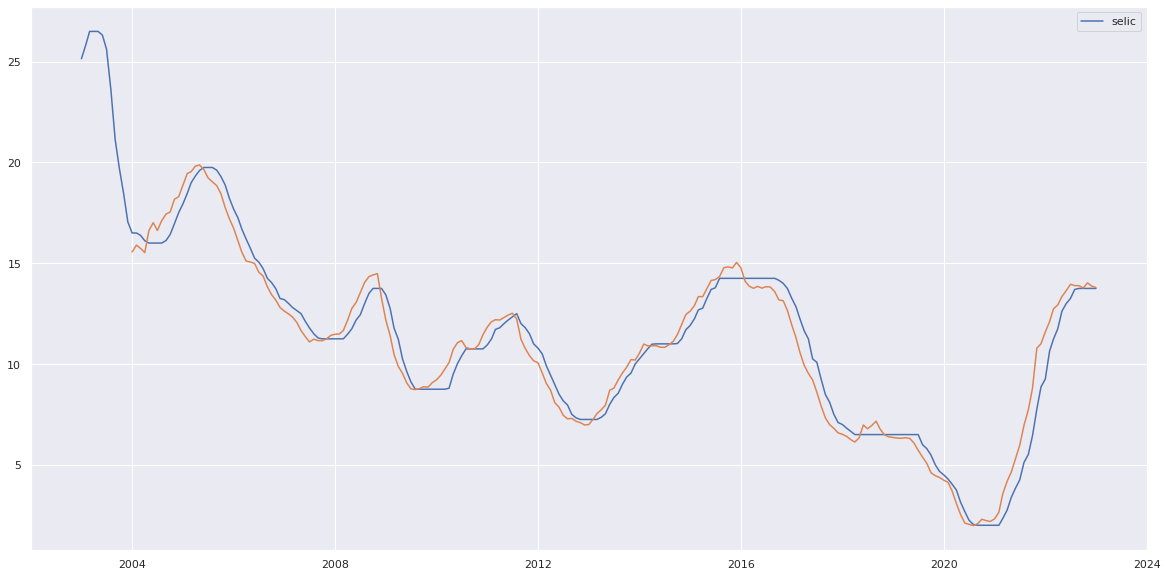

In [ ]:
plt.plot(selic,label='selic')
plt.plot(ettj_26['VALUE ((% a.a.))'])
plt.legend()

##Importando dados de sondagens da industria
A sondagem constitui-se em importante ferramenta para a tomada de decisões empresariais no âmbito privado, para a análise econômica realizada no meio acadêmico e de consultoria e na elaboração da política econômica pelo governo.

O questionário da pesquisa contém perguntas direcionadas à empresa como um todo. Nesta categoria estão enquadrados, por exemplo, os quesitos relacionados ao nível de utilização da capacidade instalada e ao contingente de mão de obra. As demais perguntas são direcionadas às principais linhas da empresa, caso dos quesitos relacionados à demanda interna e externa, estoques, situação dos negócios e produção. Informações no nível do produto permitem uma consolidação mais eficiente das respostas no plano setorial.

Trimestralmente são acrescentados quesitos ao questionário como os relativos aos fatores limitativos à expansão da produção, e avaliações sobre preços de matérias-primas e componentes nos mercados interno e externo.

In [ ]:
"""import re
import requests
from bs4 import BeautifulSoup
url = 'https://www.portaldaindustria.com.br/estatisticas/sondagem-industrial/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Encontre todos os links
links = soup.find_all('a')

# Defina a parte fixa do link
fixed_link = 'https://static.portaldaindustria.com.br/media/filer_public/0f/35/0f35b96a-96bb-4ae3-b801-66cc796a0129'

# Use a expressão regular para encontrar o link desejado
for link in links:
    href = link.get('href')
    match = re.search(fixed_link + r'/sondagemindustrial_serie-recente_.*.xls', href)
    if match:
      url = match.group()
      print(url)"""


"import re\nimport requests\nfrom bs4 import BeautifulSoup\nurl = 'https://www.portaldaindustria.com.br/estatisticas/sondagem-industrial/'\nresponse = requests.get(url)\nsoup = BeautifulSoup(response.content, 'html.parser')\n\n# Encontre todos os links\nlinks = soup.find_all('a')\n\n# Defina a parte fixa do link\nfixed_link = 'https://static.portaldaindustria.com.br/media/filer_public/0f/35/0f35b96a-96bb-4ae3-b801-66cc796a0129'\n\n# Use a expressão regular para encontrar o link desejado\nfor link in links:\n    href = link.get('href')\n    match = re.search(fixed_link + r'/sondagemindustrial_serie-recente_.*.xls', href)\n    if match:\n      url = match.group()\n      print(url)"

In [ ]:
"""response = requests.get(url)
open(f"si.xls", "wb").write(response.content)
df = pd.read_excel("si.xls", sheet_name=10,skiprows=7)
df = df.iloc[0:1,1:]
df =pd.DataFrame(df.iloc[0,:])
df.columns = ['producao']
month_dict = {'jan': '01', 'fev': '02', 'mar': '03', 'abr': '04', 'mai': '05', 'jun': '06',
              'jul': '07', 'ago': '08', 'set': '09', 'out': '10', 'nov': '11', 'dez': '12'}
lista = []
for i in df['data']:
    if type(i) == str:
        b = i[0:3].lower()
        lista.append("20"+str(i)[3:5]+"-"+ month_dict.get(b) +"-01")
    else:
        lista.append(str(i))
df['data'] = lista
df['data'] = df['data'].str.replace('20t1','2017')
df.dropna(axis=0,inplace=True)
df.index = pd.to_datetime(df['data'])
df.drop(columns='data',inplace=True)
df"""

'response = requests.get(url)\nopen(f"si.xls", "wb").write(response.content)\ndf = pd.read_excel("si.xls", sheet_name=10,skiprows=7)\ndf = df.iloc[0:1,1:]\ndf =pd.DataFrame(df.iloc[0,:])\ndf.columns = [\'producao\']\nmonth_dict = {\'jan\': \'01\', \'fev\': \'02\', \'mar\': \'03\', \'abr\': \'04\', \'mai\': \'05\', \'jun\': \'06\',\n              \'jul\': \'07\', \'ago\': \'08\', \'set\': \'09\', \'out\': \'10\', \'nov\': \'11\', \'dez\': \'12\'}\nlista = []\nfor i in df[\'data\']:\n    if type(i) == str:\n        b = i[0:3].lower()\n        lista.append("20"+str(i)[3:5]+"-"+ month_dict.get(b) +"-01")\n    else:\n        lista.append(str(i))\ndf[\'data\'] = lista\ndf[\'data\'] = df[\'data\'].str.replace(\'20t1\',\'2017\')\ndf.dropna(axis=0,inplace=True)\ndf.index = pd.to_datetime(df[\'data\'])\ndf.drop(columns=\'data\',inplace=True)\ndf'

In [ ]:
def sondagem_industria(sheet, variable):
    # Download the excel file
  import re
  import pandas as pd
  import requests
  from tempfile import NamedTemporaryFile
  import re
  import requests
  from bs4 import BeautifulSoup
  ##pagina para fazer web scraping
  url = 'https://www.portaldaindustria.com.br/estatisticas/sondagem-industrial/'
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')

  # Encontre todos os links
  links = soup.find_all('a')

# Defina a parte fixa do link
  fixed_link = 'https://static.portaldaindustria.com.br/media/filer_public/0f/35/0f35b96a-96bb-4ae3-b801-66cc796a0129'

# Use a expressão regular para encontrar o link desejado
  for link in links:
    href = link.get('href')
    match = re.search(fixed_link + r'/sondagemindustrial_serie-recente_.*.xls', href)
    if match:
      url = match.group()

  response = requests.get(url)
  open(f"si.xls", "wb").write(response.content)
  df = pd.read_excel("si.xls", sheet_name=sheet,skiprows=7)
  df = df.iloc[0:1,1:]
  df =pd.DataFrame(df.iloc[0,:])
  df.columns = [variable]
  lista=[]
  for i in df.index:
    if type(i) == str:
      b= np.where(i[0:3] == 'jan','01',np.where(i[0:3] == 'fev','02',np.where(i[0:3] == 'mar','03',np.where(i[0:3] == 'abr','04',np.where(i[0:3] == 'mai','05',np.where(i[0:3] == 'jun','06',
      np.where(i[0:3] == 'jul','07',np.where(i[0:3] == 'ago','08',np.where(i[0:3] == 'set','09',np.where(i[0:3] == 'out','10',np.where(i[0:3] == 'nov','11',np.where(i[0:3] == 'dez','12',i[0:3]))))))))))))
      lista.append("20"+str(i)[3:5]+"-"+str(b)+"-01")
    else:
      lista.append(str(i))
  df['data'] = lista
  df['data'] = df['data'].str.replace('20t1','2017')
  df.dropna(axis=0,inplace=True)
  df.index = pd.to_datetime(df['data'])
  df.drop(columns='data',inplace=True)
  df[variable] = df[variable].astype(float)
  return df


In [ ]:
##Tem que diminuir um valor das sheets pois comeca em zero, entao no arquivo exel sond_estoque 5
sond_estoques = sondagem_industria(4, "sond_estoques")
sond_demanda = sondagem_industria(6, "sond_demanda")
sond_exportacao = sondagem_industria(7, "sond_exportacao")
sond_compras = sondagem_industria(8, "sond_compras")
sond_empregados = sondagem_industria(9, "sond_empregados")

In [ ]:
sond_empregados

sond_empregados
data                       
2007-04-01             52.8
2007-07-01             53.4
2007-10-01             53.5
2008-01-01             53.4
2008-04-01             54.5
...                     ...
2022-09-01             53.9
2022-10-01             52.3
2022-11-01             49.0
2022-12-01             49.0
2023-01-01             49.0

[160 rows x 1 columns]

##Juntando os dados


In [ ]:
dados= pd.DataFrame(index=pd.date_range(start=data_inicio,end=date.today(),freq='MS'))

In [ ]:
dados['trafego_pesado'] = trafego_pesado['pesado']
dados['producao_ind'] = producao_ind['VALUE ((% a.a.))']
dados['producao_ind_int'] = producao_ind_int['VALUE (-)']
dados['capacidade_instalada'] = capacidade_instalada['VALUE ((%))']
dados['caixas'] = round(caixas['VALUE (Tonelada)'],2)
dados['faturamento'] = round(faturamento['VALUE (-)'])
dados['importacoes'] = importacoes['VALUE (-)']
dados['importacoes_int'] = importacoes_int['VALUE (-)']
dados['confianca_empresario_exp'] = confianca_empresario_exp['VALUE (-)']
dados['confianca_empresario_atual'] = confianca_empresario_atual['VALUE (-)']
dados['confianca_consumidor'] =confianca_consumidor['VALUE (-)']
dados['producao_de_veiculos'] = veiculos['Producao_de_veiculos']
dados['producao_aco'] = producao_aco['Producao_de_aco']
dados['sond_compras'] = sond_compras['sond_compras']
dados['sond_estoques'] = sond_estoques['sond_estoques']
dados['sond_demanda'] = sond_demanda['sond_demanda']
dados['sond_exportacao'] = sond_exportacao['sond_exportacao']
dados['sond_empregados'] = sond_empregados['sond_empregados']
dados['selic'] = selic['Selic']
dados['ettj_26'] = ettj_26['VALUE ((% a.a.))']

In [ ]:
dados.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-01-01      104.405426      2.193232          80.44376   
2003-02-01      100.670444      2.965599          77.56646   
2003-03-01      110.228054      0.018282          87.11254   
2003-04-01      111.028933     -3.858137          84.51989   
2003-05-01      116.094954     -0.952090          87.89121   

            capacidade_instalada     caixas  faturamento  importacoes  \
2003-01-01                  79.5  192570.98         88.0        39.01   
2003-02-01                  79.2  188701.42         90.0        40.05   
2003-03-01                  79.8  198670.82         92.0        38.37   
2003-04-01                  79.3  197587.54         89.0        42.09   
2003-05-01                  80.2  191781.32         93.0        41.02   

            importacoes_int  confianca_empresario_exp  \
2003-01-01            38.81                       NaN   
2003-02-01            39.99                       NaN   
2003-03-01            39.08                       NaN   
2003-04-01            41.27                       NaN   
2003-05-01            43.55                       NaN   

            confianca_empresario_atual  confianca_consumidor  \
2003-01-01                         NaN                102.97   
2003-02-01                         NaN                103.53   
2003-03-01                         NaN                101.89   
2003-04-01                         NaN                107.66   
2003-05-01                         NaN                112.04   

            producao_de_veiculos  producao_aco  sond_compras  sond_estoques  \
2003-01-01              132208.0        127.88           NaN            NaN   
2003-02-01              141129.0        118.47           NaN            NaN   
2003-03-01              127486.0        133.11           NaN            NaN   
2003-04-01              130783.0        126.92           NaN            NaN   
2003-05-01              141857.0        134.47           NaN            NaN   

            sond_demanda  sond_exportacao  sond_empregados      selic  ettj_26  
2003-01-01           NaN              NaN              NaN  25.145161      NaN  
2003-02-01           NaN              NaN              NaN  25.821429      NaN  
2003-03-01           NaN              NaN              NaN  26.500000      NaN  
2003-04-01           NaN              NaN              NaN  26.500000      NaN  
2003-05-01           NaN              NaN              NaN  26.500000      NaN

##Salvando os dados

In [ ]:
dados.to_csv('producao_industrial.csv')

#Visualiçâo dos dados e tratamentos
documentacao plotly:https://plotly.com/python/

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2003-01-01 to 2023-01-01
Freq: MS
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trafego_pesado              240 non-null    float64
 1   producao_ind                239 non-null    float64
 2   producao_ind_int            239 non-null    float64
 3   capacidade_instalada        239 non-null    float64
 4   caixas                      240 non-null    float64
 5   faturamento                 239 non-null    float64
 6   importacoes                 239 non-null    float64
 7   importacoes_int             239 non-null    float64
 8   confianca_empresario_exp    157 non-null    float64
 9   confianca_empresario_atual  157 non-null    float64
 10  confianca_consumidor        240 non-null    float64
 11  producao_de_veiculos        240 non-null    float64
 12  producao_aco                240 non-null    float64
 13  sond_co

##Verificando estacionaridade

In [ ]:
def test_kpss_adf(dados):
  #https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
  def kpss_test(timeseries):
    """
    O KPSS é outro teste para verificar a estacionaridade de uma série temporal. As hipóteses nula e alternativa para o teste KPSS são opostas às do teste ADF.

    Hipótese Nula: O processo é estacionário de tendência.

    Hipótese Alternativa: A série tem raiz unitária (a série não é estacionária).

    Uma função é criada para realizar o teste KPSS em uma série temporal.
    """
    #print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
      kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    return kpss_output

  def adf_test(timeseries):

    """
    O teste ADF é usado para determinar a presença de raiz unitária na série e, portanto, ajuda a entender se a série é estacionária ou não. As hipóteses nula e 
    alternativa deste teste são:
    Hipótese Nula: A série tem raiz unitária.
    Hipótese alternativa: A série não tem raiz unitária.
    Se a hipótese nula não for rejeitada, este teste pode fornecer evidências de que a série é não estacionária.
   Uma função é criada para realizar o teste ADF em uma série temporal.
    """
    #print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
      dftest[0:4],
      index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
      dfoutput["Critical Value (%s)" % key] = value
    return dfoutput


  test_est = pd.DataFrame(index=dados.columns,columns = ['Teste_kpss', 'Estacionaria_ou_nâo_kpss','Teste_adf','Estacionaria_ou_nâo_adf'])
  for k in dados.columns:
    tes_kpss = kpss_test(dados[k].dropna())
    test_est.loc[k,test_est.columns[0]] = tes_kpss[1]
    tes_adf = adf_test(dados[k].dropna())
    test_est.loc[k,test_est.columns[2]] = tes_adf[1]
  test_est['Estacionaria_ou_nâo_kpss']=np.where(test_est['Teste_kpss'] >= 0.05,'Estacionaria','Nâo estacionaria')
  test_est['Estacionaria_ou_nâo_adf']=np.where(test_est['Teste_adf'] <= 0.05,'Estacionaria','Nâo estacionaria')
  return test_est

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  from statsmodels.tsa.stattools import adfuller
  import pandas as pd
  import matplotlib.pylab as plt
  import seaborn as sns
  import numpy as np
  for i in range(len(timeseries.columns)):
  #Determing rolling statistics
    rolmean = pd.Series(timeseries.iloc[:,i]).rolling(window=12).mean().dropna()
    rolstd = pd.Series(timeseries.iloc[:,i]).rolling(window=12).std().dropna()

    #Plot rolling statistics:
    orig = plt.plot(timeseries.iloc[:,i], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation na variavel {dados.columns[i]}')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print (f'Results of Dickey-Fuller Test:Coluna {dados.columns[i]}')
    dftest = adfuller(timeseries.iloc[:,i].dropna(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
  return test_kpss_adf(timeseries)

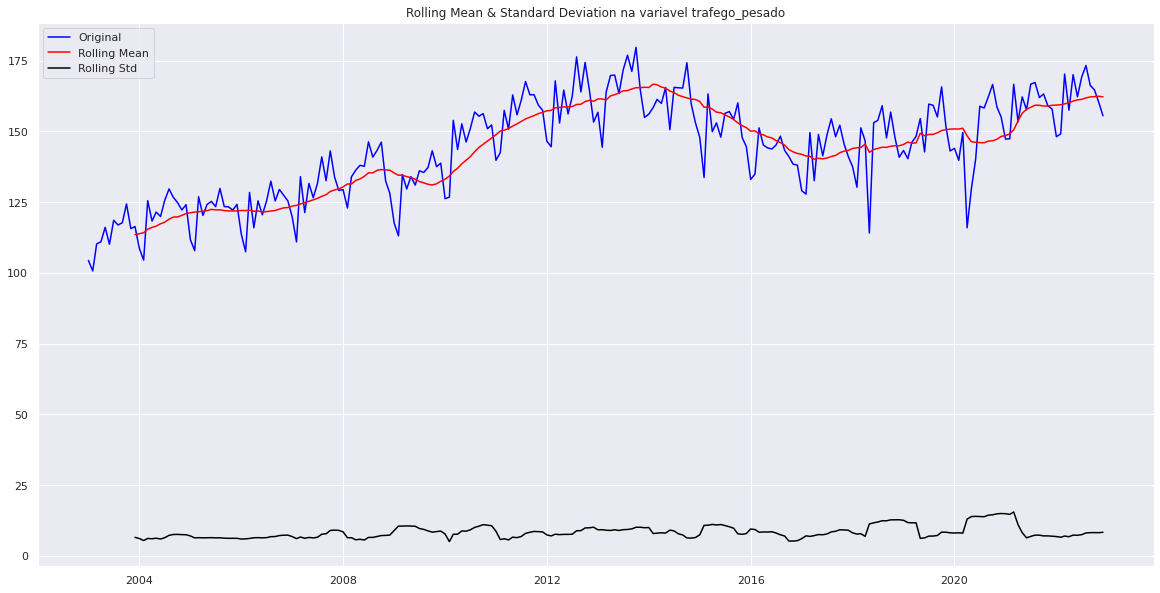

Results of Dickey-Fuller Test:Coluna trafego_pesado
Test Statistic                  -1.599867
p-value                          0.483660
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


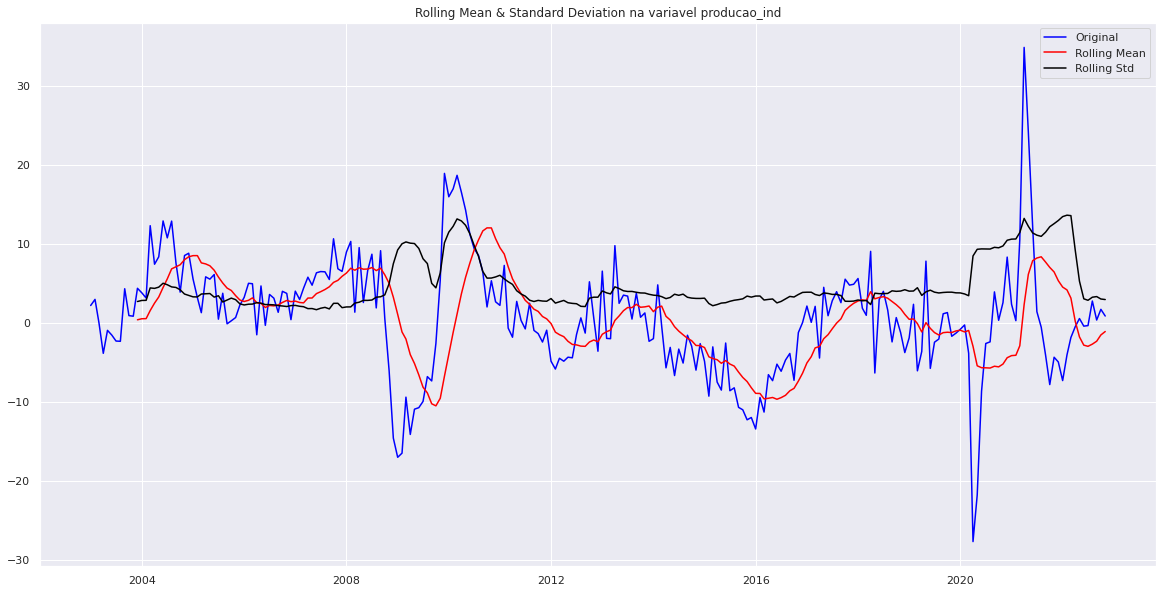

Results of Dickey-Fuller Test:Coluna producao_ind
Test Statistic                  -3.451834
p-value                          0.009314
#Lags Used                      12.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.459620
Critical Value (5%)             -2.874415
Critical Value (10%)            -2.573632
dtype: float64


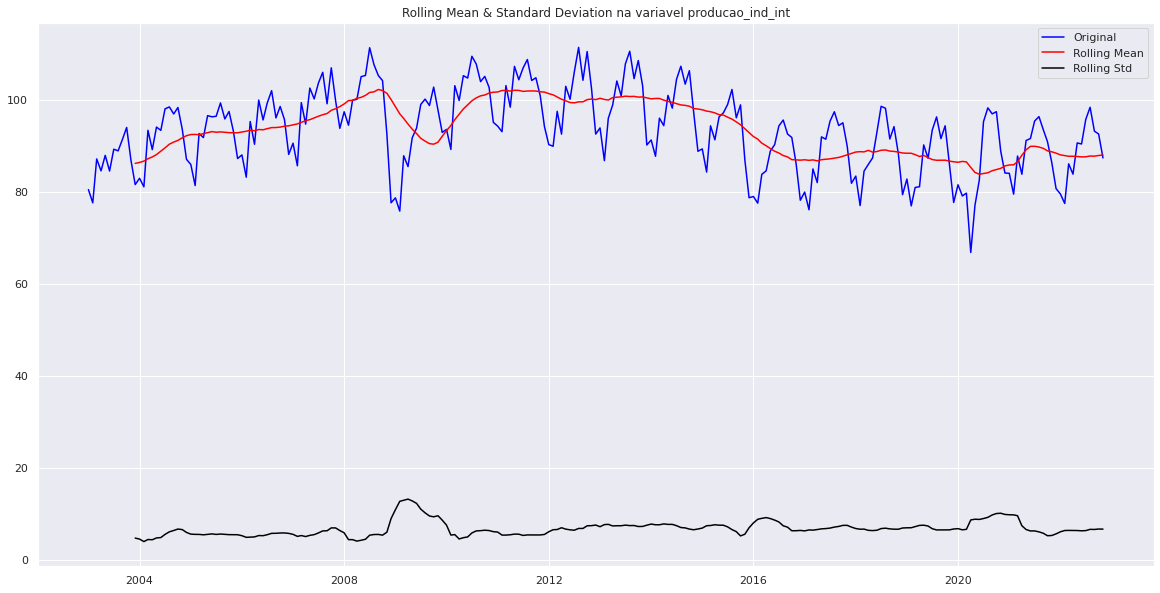

Results of Dickey-Fuller Test:Coluna producao_ind_int
Test Statistic                  -2.098893
p-value                          0.244960
#Lags Used                      12.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.459620
Critical Value (5%)             -2.874415
Critical Value (10%)            -2.573632
dtype: float64


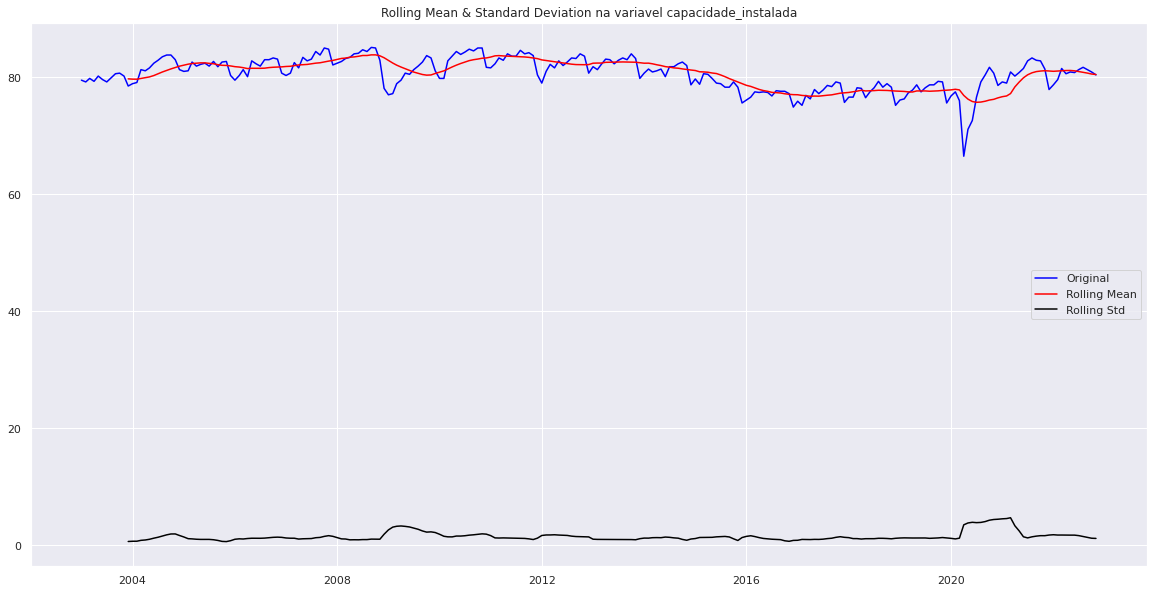

Results of Dickey-Fuller Test:Coluna capacidade_instalada
Test Statistic                  -2.120159
p-value                          0.236486
#Lags Used                      12.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.459620
Critical Value (5%)             -2.874415
Critical Value (10%)            -2.573632
dtype: float64


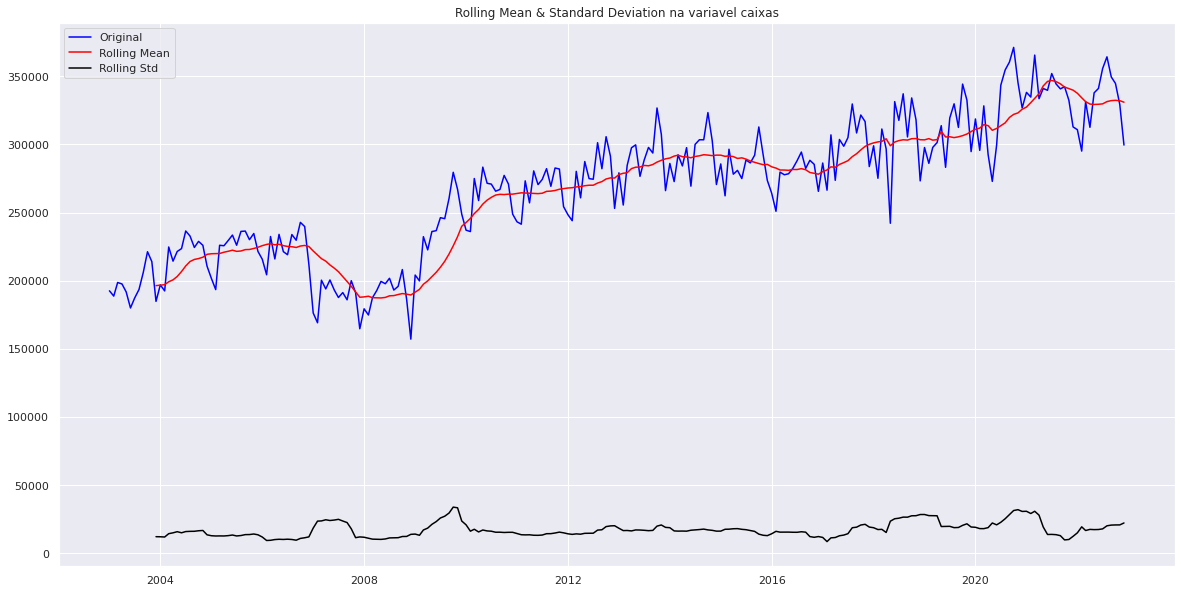

Results of Dickey-Fuller Test:Coluna caixas
Test Statistic                  -1.162991
p-value                          0.689310
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


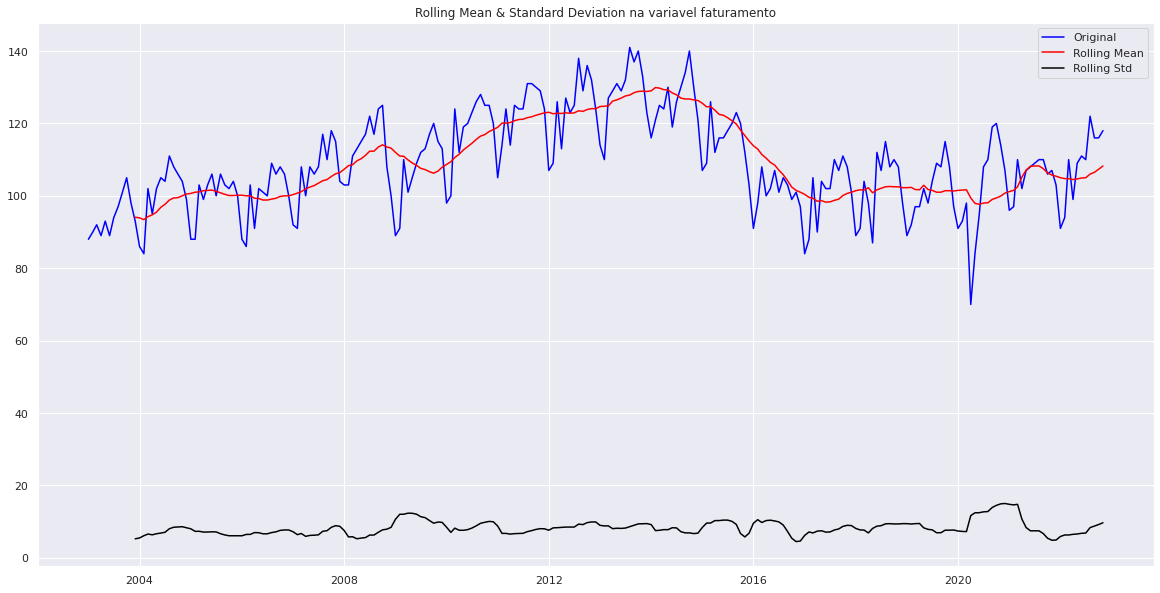

Results of Dickey-Fuller Test:Coluna faturamento
Test Statistic                  -2.114556
p-value                          0.238702
#Lags Used                      13.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


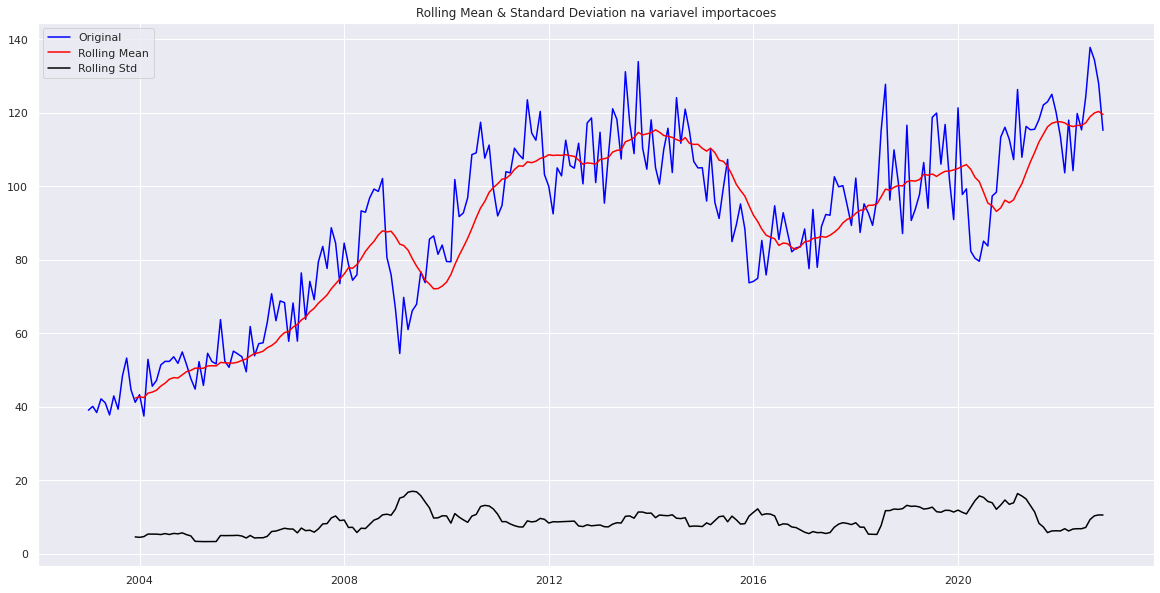

Results of Dickey-Fuller Test:Coluna importacoes
Test Statistic                  -1.979150
p-value                          0.295789
#Lags Used                      15.000000
Number of Observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64


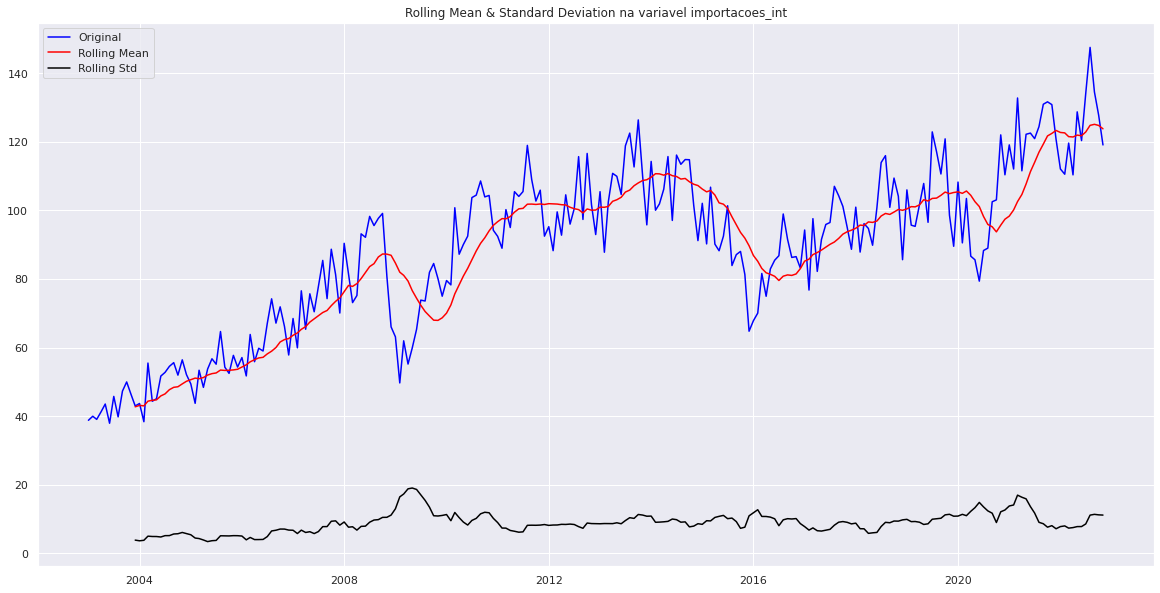

Results of Dickey-Fuller Test:Coluna importacoes_int
Test Statistic                  -1.899225
p-value                          0.332426
#Lags Used                      15.000000
Number of Observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64


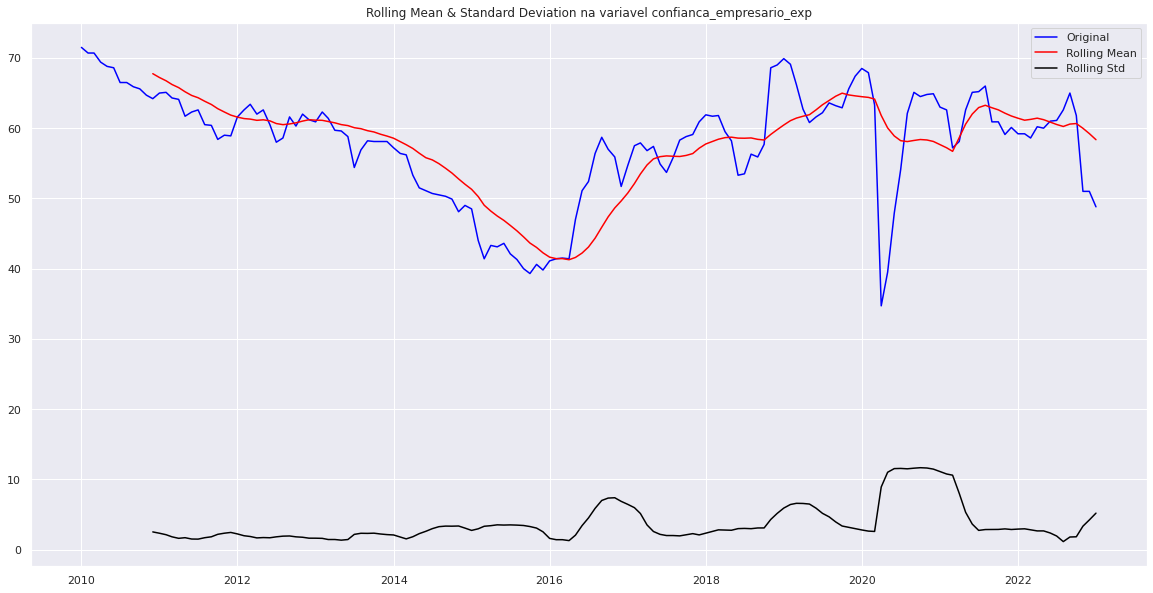

Results of Dickey-Fuller Test:Coluna confianca_empresario_exp
Test Statistic                  -3.484878
p-value                          0.008384
#Lags Used                       1.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64


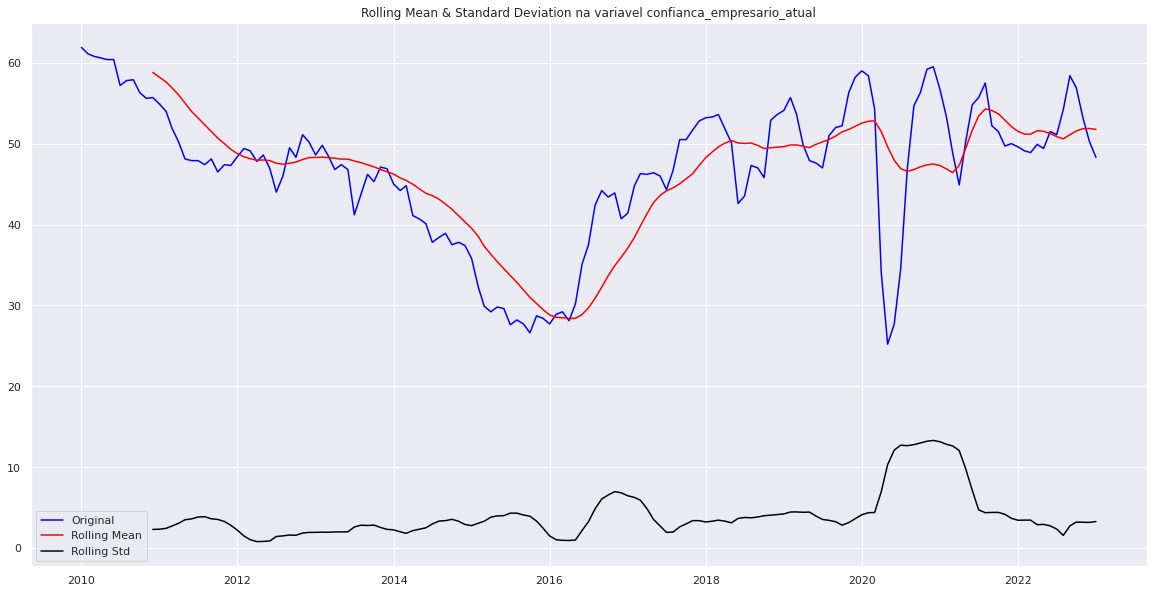

Results of Dickey-Fuller Test:Coluna confianca_empresario_atual
Test Statistic                  -1.880330
p-value                          0.341370
#Lags Used                       9.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64


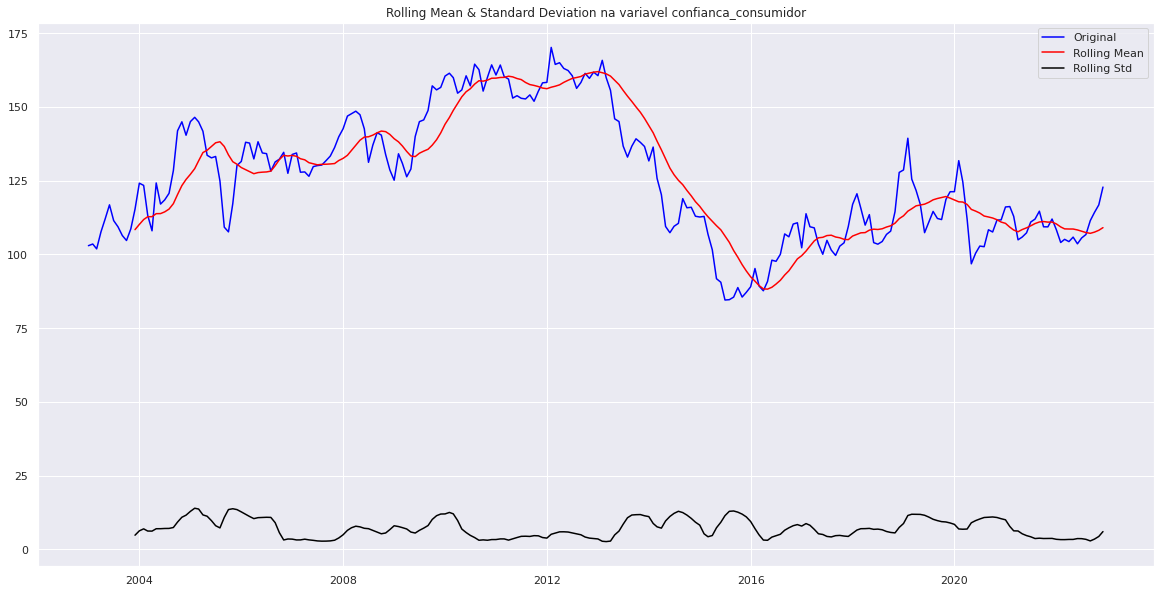

Results of Dickey-Fuller Test:Coluna confianca_consumidor
Test Statistic                  -2.258336
p-value                          0.185758
#Lags Used                       1.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64


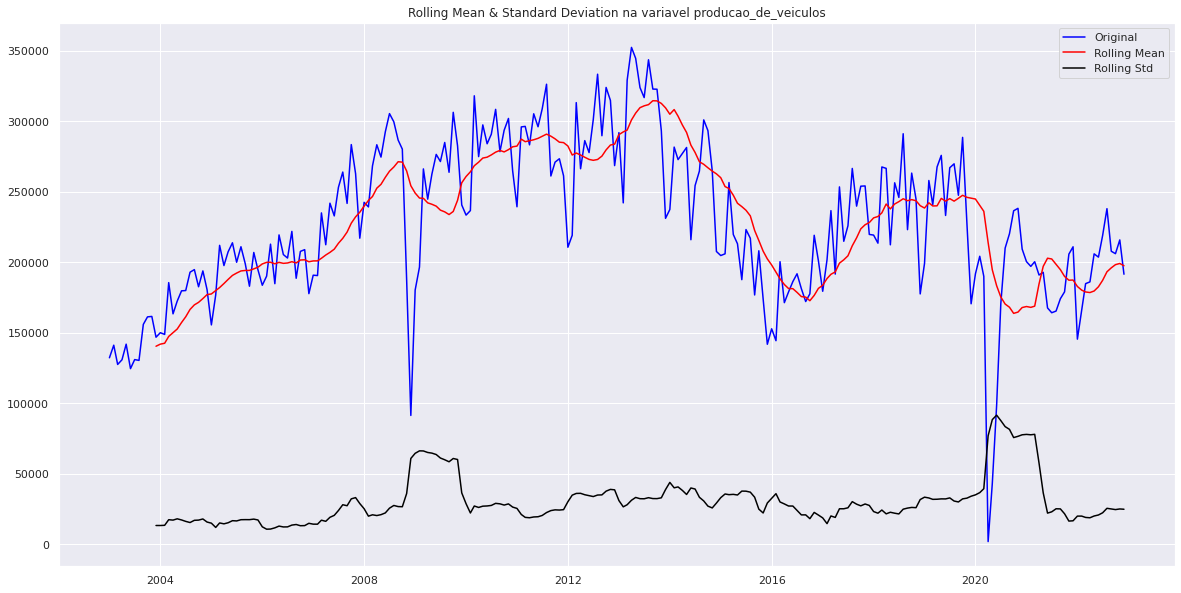

Results of Dickey-Fuller Test:Coluna producao_de_veiculos
Test Statistic                  -2.254343
p-value                          0.187116
#Lags Used                      12.000000
Number of Observations Used    227.000000
Critical Value (1%)             -3.459490
Critical Value (5%)             -2.874358
Critical Value (10%)            -2.573602
dtype: float64


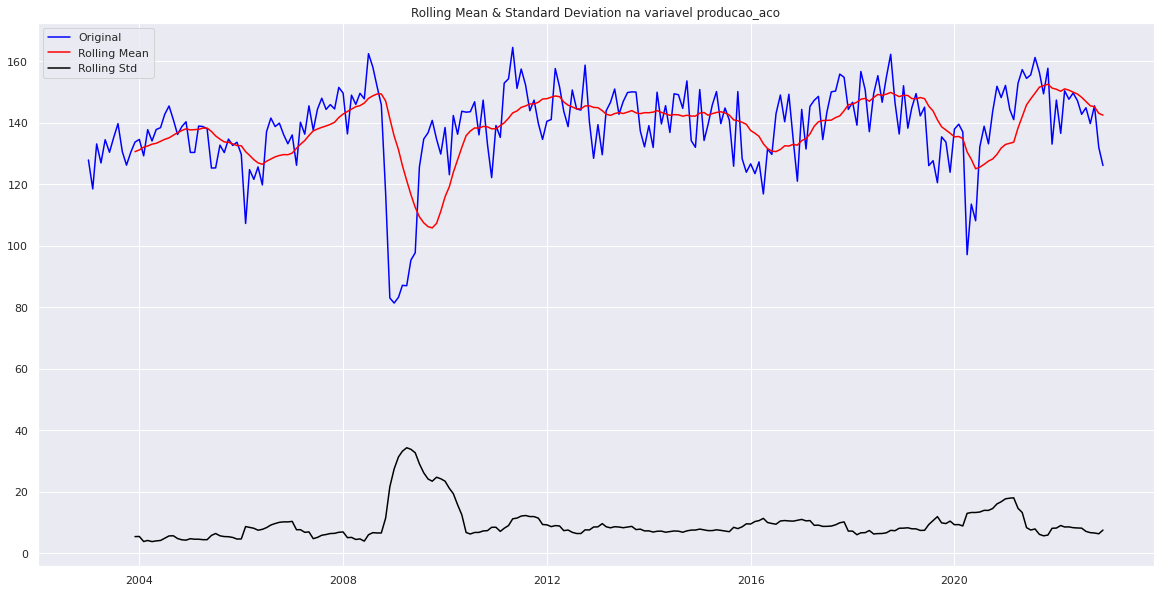

Results of Dickey-Fuller Test:Coluna producao_aco
Test Statistic                  -4.356090
p-value                          0.000355
#Lags Used                      12.000000
Number of Observations Used    227.000000
Critical Value (1%)             -3.459490
Critical Value (5%)             -2.874358
Critical Value (10%)            -2.573602
dtype: float64


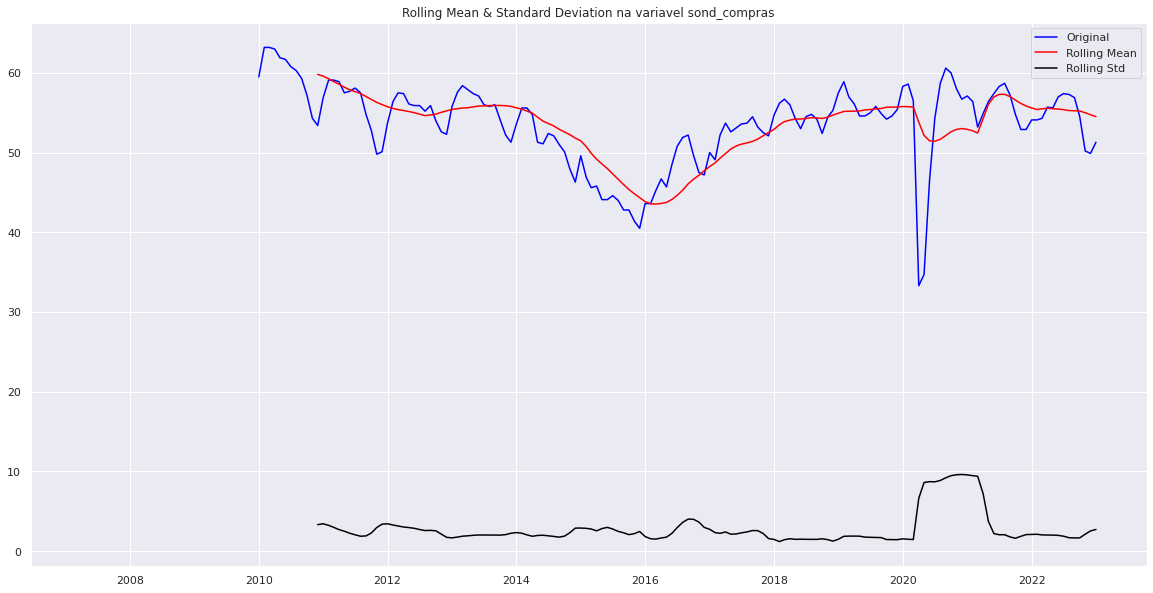

Results of Dickey-Fuller Test:Coluna sond_compras
Test Statistic                  -3.278482
p-value                          0.015868
#Lags Used                       4.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64


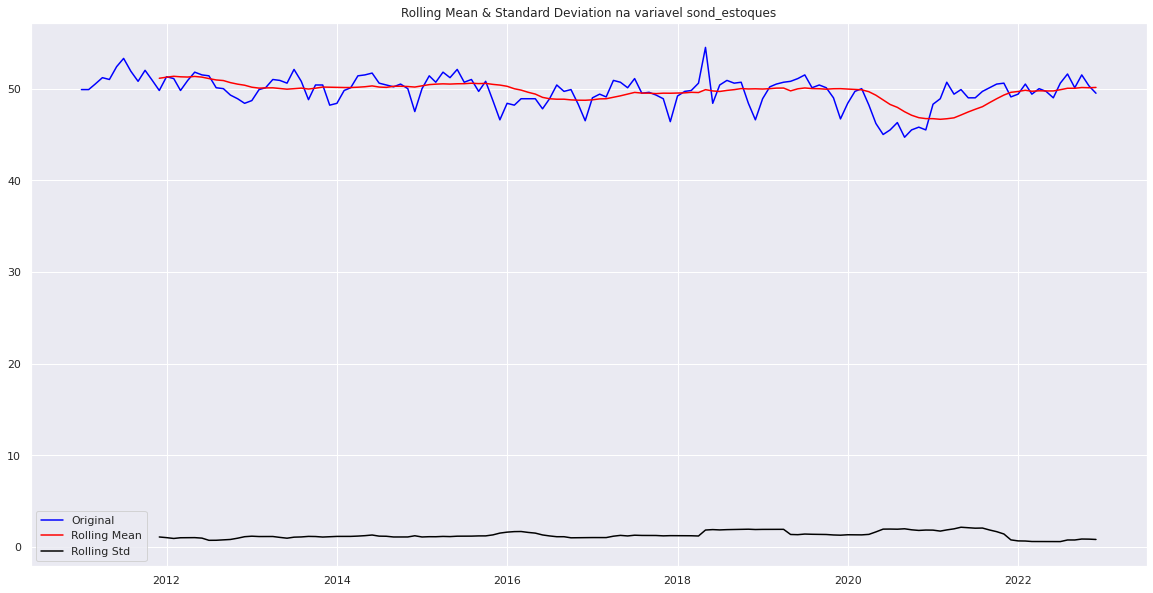

Results of Dickey-Fuller Test:Coluna sond_estoques
Test Statistic                  -3.333728
p-value                          0.013437
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


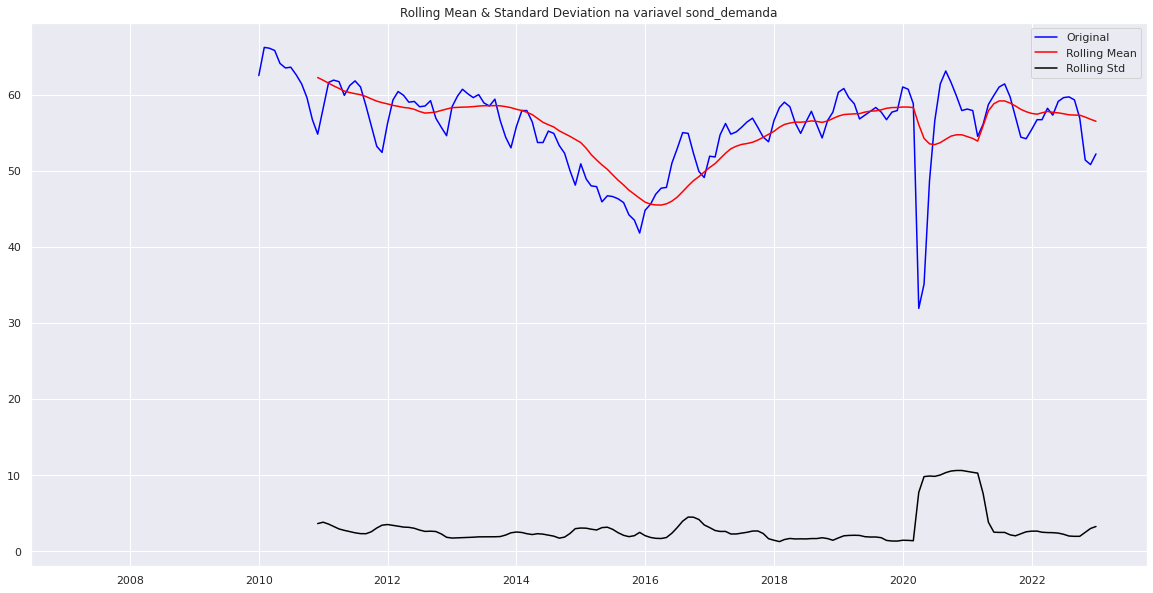

Results of Dickey-Fuller Test:Coluna sond_demanda
Test Statistic                  -3.409150
p-value                          0.010651
#Lags Used                       4.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64


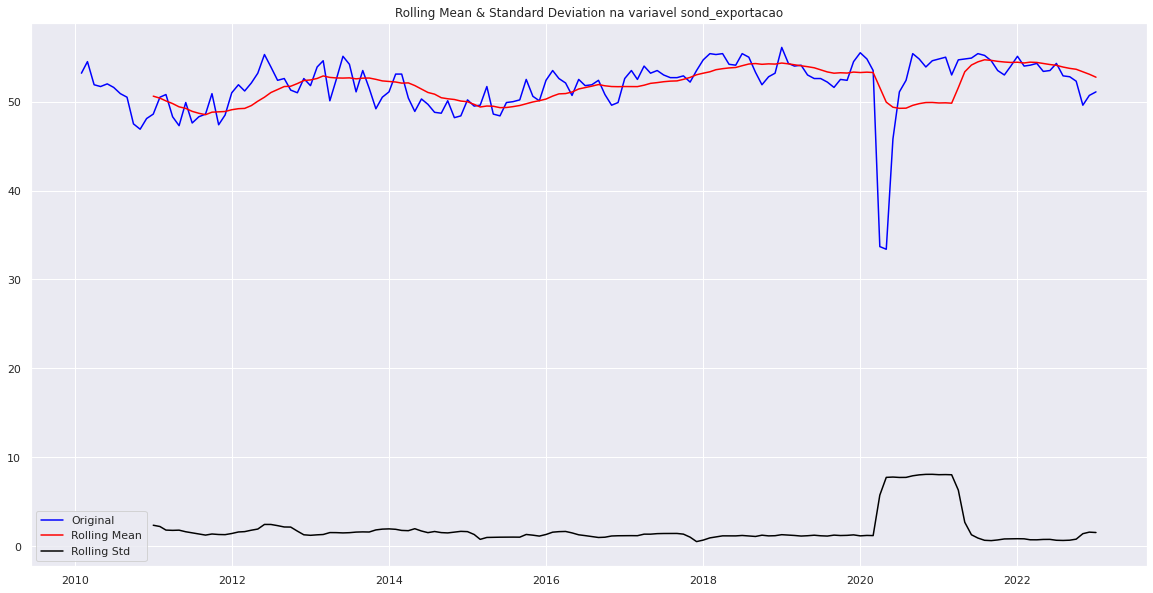

Results of Dickey-Fuller Test:Coluna sond_exportacao
Test Statistic                  -4.649645
p-value                          0.000105
#Lags Used                       2.000000
Number of Observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64


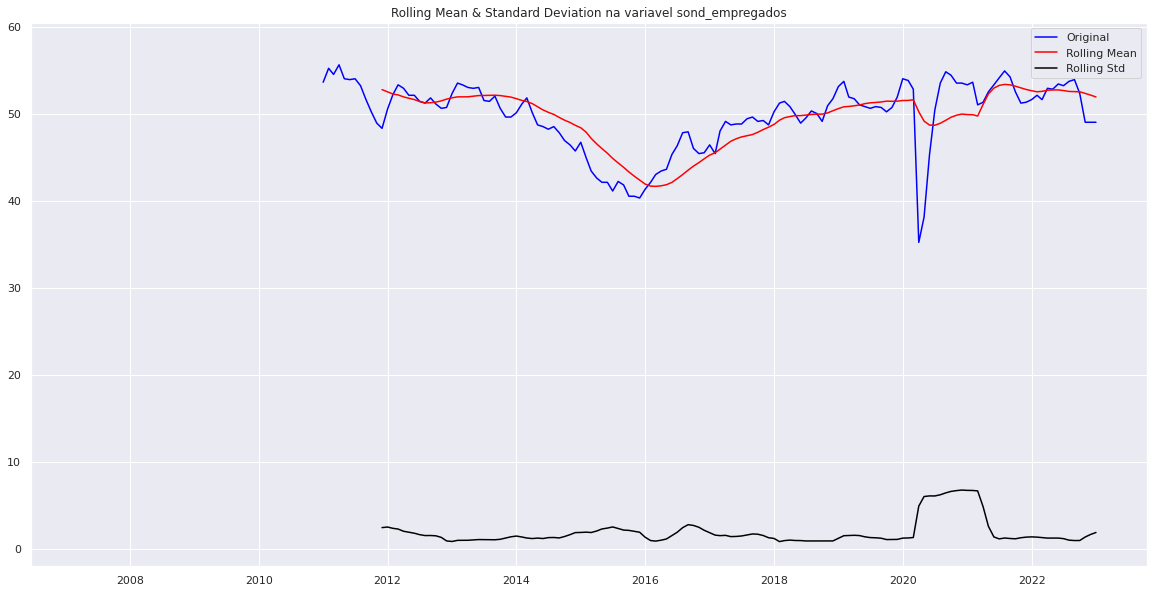

Results of Dickey-Fuller Test:Coluna sond_empregados
Test Statistic                  -3.010803
p-value                          0.033898
#Lags Used                       3.000000
Number of Observations Used    156.000000
Critical Value (1%)             -3.472979
Critical Value (5%)             -2.880252
Critical Value (10%)            -2.576747
dtype: float64


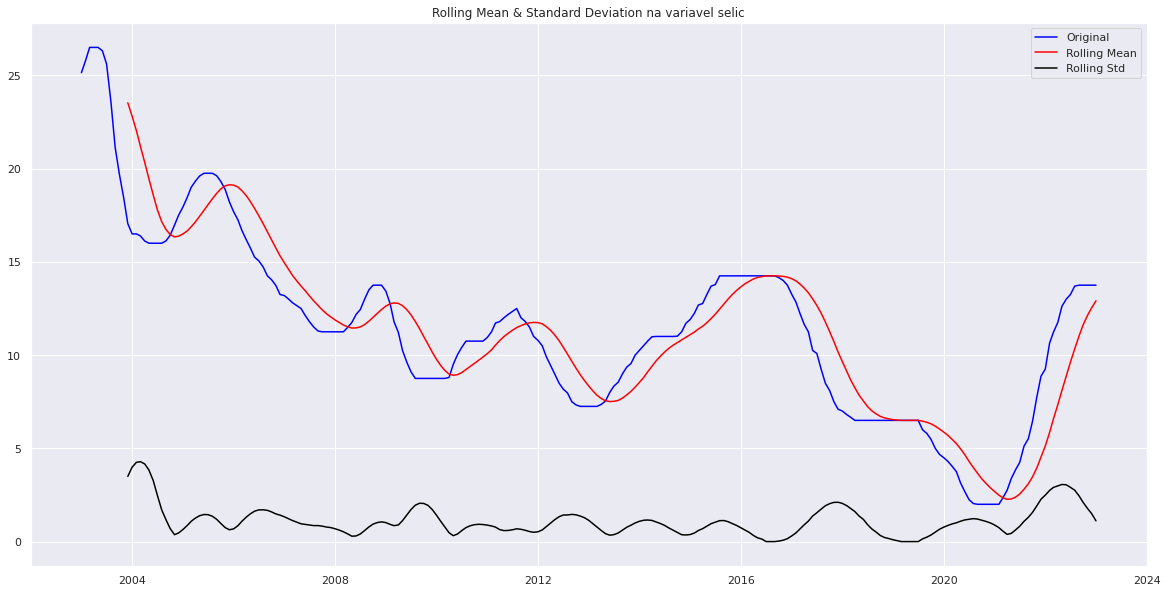

Results of Dickey-Fuller Test:Coluna selic
Test Statistic                  -3.155923
p-value                          0.022682
#Lags Used                       5.000000
Number of Observations Used    235.000000
Critical Value (1%)             -3.458487
Critical Value (5%)             -2.873919
Critical Value (10%)            -2.573367
dtype: float64


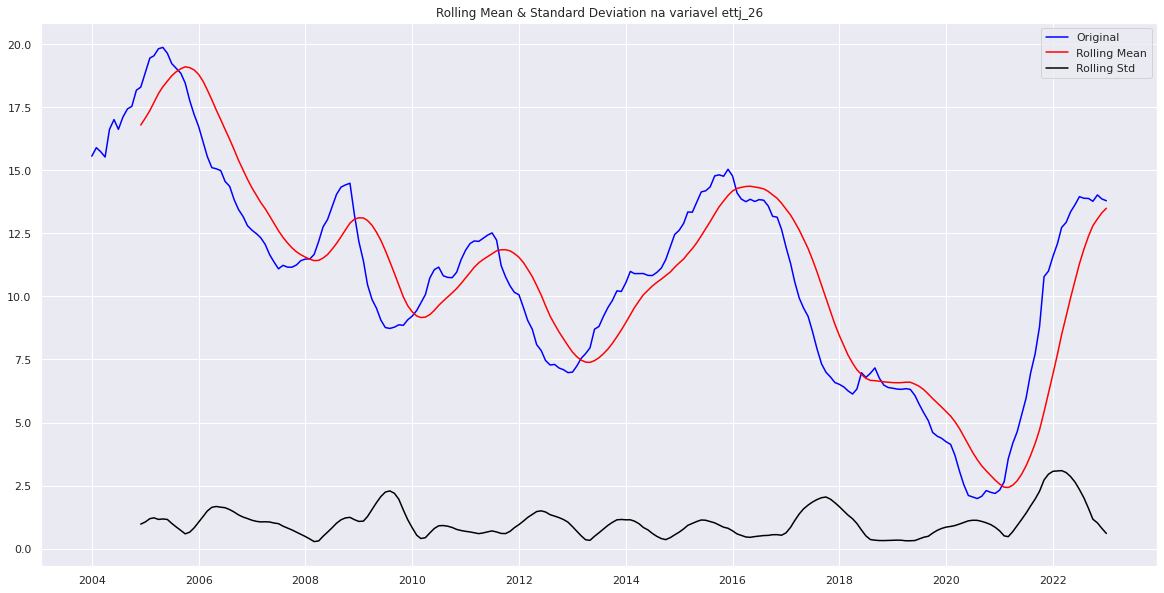

Results of Dickey-Fuller Test:Coluna ettj_26
Test Statistic                  -2.900468
p-value                          0.045294
#Lags Used                       3.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.8/dis

In [ ]:
test_estacionario =test_stationarity(dados)

In [ ]:
test_estacionario

Teste_kpss Estacionaria_ou_nâo_kpss Teste_adf  \
trafego_pesado                   0.01         Nâo estacionaria   0.48366   
producao_ind                 0.092393             Estacionaria  0.009314   
producao_ind_int                 0.01         Nâo estacionaria   0.24496   
capacidade_instalada             0.01         Nâo estacionaria  0.236486   
caixas                           0.01         Nâo estacionaria   0.68931   
faturamento                  0.055529             Estacionaria  0.238702   
importacoes                      0.01         Nâo estacionaria  0.295789   
importacoes_int                  0.01         Nâo estacionaria  0.332426   
confianca_empresario_exp          0.1             Estacionaria  0.008384   
confianca_empresario_atual        0.1             Estacionaria   0.34137   
confianca_consumidor             0.01         Nâo estacionaria  0.185758   
producao_de_veiculos          0.06938             Estacionaria  0.187116   
producao_aco                 0.092632             Estacionaria  0.000355   
sond_compras                      0.1             Estacionaria  0.015868   
sond_estoques                0.041709         Nâo estacionaria  0.013437   
sond_demanda                      0.1             Estacionaria  0.010651   
sond_exportacao              0.045634         Nâo estacionaria  0.000105   
sond_empregados                   0.1             Estacionaria  0.033898   
selic                            0.01         Nâo estacionaria  0.022682   
ettj_26                          0.01         Nâo estacionaria  0.045294   

                           Estacionaria_ou_nâo_adf  
trafego_pesado                    Nâo estacionaria  
producao_ind                          Estacionaria  
producao_ind_int                  Nâo estacionaria  
capacidade_instalada              Nâo estacionaria  
caixas                            Nâo estacionaria  
faturamento                       Nâo estacionaria  
importacoes                       Nâo estacionaria  
importacoes_int                   Nâo estacionaria  
confianca_empresario_exp              Estacionaria  
confianca_empresario_atual        Nâo estacionaria  
confianca_consumidor              Nâo estacionaria  
producao_de_veiculos              Nâo estacionaria  
producao_aco                          Estacionaria  
sond_compras                          Estacionaria  
sond_estoques                         Estacionaria  
sond_demanda                          Estacionaria  
sond_exportacao                       Estacionaria  
sond_empregados                       Estacionaria  
selic                                 Estacionaria  
ettj_26                               Estacionaria

In [ ]:
def report_ndiffs (dados,test=['kpss', 'adf', 'pp'],alpha=0.05):
  dat_ndifis = pd.DataFrame(index=dados.columns)
  for i in test:
    dat_n = []
    for j in dados.columns:
      dat_n.append(arima.ndiffs(dados[j].dropna(),alpha,test=i))
    dat_ndifis[i] = dat_n
  result = []
  for k in range(len(dat_ndifis)):
    result.append(np.where(dat_ndifis.iloc[k,0]==dat_ndifis.iloc[k,1],dat_ndifis.iloc[k,0],
         np.where(dat_ndifis.iloc[k,1]==dat_ndifis.iloc[k,2],dat_ndifis.iloc[k,1],
                  np.where(dat_ndifis.iloc[k,0]==dat_ndifis.iloc[k,2],dat_ndifis.iloc[k,2],''))))
  dat_ndifis['Ndifis'] = result
  dat_ndifis.sort_values(by='Ndifis',ascending=False,inplace=True)
  dat_ndifis['Ndifis'] = dat_ndifis['Ndifis'].astype(int)
  return dat_ndifis

In [ ]:
ndifis = report_ndiffs(dados)
ndifis

kpss  adf  pp  Ndifis
trafego_pesado                 1    1   0       1
importacoes_int                1    1   0       1
selic                          1    1   1       1
producao_de_veiculos           1    1   0       1
confianca_empresario_atual     1    1   1       1
confianca_empresario_exp       0    1   1       1
confianca_consumidor           1    1   1       1
importacoes                    1    1   0       1
faturamento                    1    1   0       1
caixas                         1    1   0       1
ettj_26                        1    1   1       1
producao_ind                   1    0   0       0
capacidade_instalada           1    0   0       0
producao_aco                   1    0   0       0
sond_compras                   0    1   0       0
sond_estoques                  1    0   0       0
sond_demanda                   0    1   0       0
sond_exportacao                1    0   0       0
sond_empregados                0    1   0       0
producao_ind_int               1    0   0       0

##Corrigindo estacionaridade

In [ ]:
def corrigindo_nao_estacionaridade(base,n_difis):
  dados_est = base.copy()
  for i in n_difis[n_difis['Ndifis'] >= 1].index:
    if i == 'producao_ind':
      dados_est[i] = dados_est[i]
    else:
      dados_est[i] = dados_est[i].diff(periods=n_difis[n_difis.index.isin([i])]['Ndifis'])
  return dados_est

In [ ]:
dados_estacionarios = corrigindo_nao_estacionaridade(dados,ndifis)[1:]
dados_estacionarios.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-02-01       -3.734983      2.965599          77.56646   
2003-03-01        9.557611      0.018282          87.11254   
2003-04-01        0.800879     -3.858137          84.51989   
2003-05-01        5.066021     -0.952090          87.89121   
2003-06-01       -5.994100     -1.553636          84.48595   

            capacidade_instalada    caixas  faturamento  importacoes  \
2003-02-01                  79.2  -3869.56          2.0         1.04   
2003-03-01                  79.8   9969.40          2.0        -1.68   
2003-04-01                  79.3  -1083.28         -3.0         3.72   
2003-05-01                  80.2  -5806.22          4.0        -1.07   
2003-06-01                  79.6 -11817.34         -4.0        -3.30   

            importacoes_int  confianca_empresario_exp  \
2003-02-01             1.18                       NaN   
2003-03-01            -0.91                       NaN   
2003-04-01             2.19                       NaN   
2003-05-01             2.28                       NaN   
2003-06-01            -5.60                       NaN   

            confianca_empresario_atual  confianca_consumidor  \
2003-02-01                         NaN                  0.56   
2003-03-01                         NaN                 -1.64   
2003-04-01                         NaN                  5.77   
2003-05-01                         NaN                  4.38   
2003-06-01                         NaN                  4.77   

            producao_de_veiculos  producao_aco  sond_compras  sond_estoques  \
2003-02-01                8921.0        118.47           NaN            NaN   
2003-03-01              -13643.0        133.11           NaN            NaN   
2003-04-01                3297.0        126.92           NaN            NaN   
2003-05-01               11074.0        134.47           NaN            NaN   
2003-06-01              -17346.0        130.39           NaN            NaN   

            sond_demanda  sond_exportacao  sond_empregados     selic  ettj_26  
2003-02-01           NaN              NaN              NaN  0.676267      NaN  
2003-03-01           NaN              NaN              NaN  0.678571      NaN  
2003-04-01           NaN              NaN              NaN  0.000000      NaN  
2003-05-01           NaN              NaN              NaN  0.000000      NaN  
2003-06-01           NaN              NaN              NaN -0.183333      NaN

In [ ]:
report_ndiffs(dados_estacionarios)

kpss  adf  pp  Ndifis
capacidade_instalada           1    1   0       1
trafego_pesado                 0    0   0       0
producao_de_veiculos           0    0   0       0
selic                          0    0   0       0
sond_empregados                0    1   0       0
sond_exportacao                1    0   0       0
sond_demanda                   0    1   0       0
sond_estoques                  1    0   0       0
sond_compras                   0    1   0       0
producao_aco                   1    0   0       0
confianca_consumidor           0    0   0       0
producao_ind                   1    0   0       0
confianca_empresario_atual     0    0   0       0
confianca_empresario_exp       0    0   0       0
importacoes_int                0    0   0       0
importacoes                    0    0   0       0
faturamento                    0    0   0       0
caixas                         0    0   0       0
producao_ind_int               1    0   0       0
ettj_26                        0    0   0       0

In [ ]:
test_estacionario =test_stationarity(dados_estacionarios)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
test_estacionario

Teste_kpss Estacionaria_ou_nâo_kpss Teste_adf  \
trafego_pesado                    0.1             Estacionaria  0.002874   
producao_ind                 0.093186             Estacionaria  0.009565   
producao_ind_int                 0.01         Nâo estacionaria  0.262596   
capacidade_instalada             0.01         Nâo estacionaria  0.240515   
caixas                            0.1             Estacionaria  0.003525   
faturamento                       0.1             Estacionaria  0.000572   
importacoes                       0.1             Estacionaria  0.000245   
importacoes_int                   0.1             Estacionaria  0.000059   
confianca_empresario_exp          0.1             Estacionaria       0.0   
confianca_empresario_atual        0.1             Estacionaria  0.000011   
confianca_consumidor              0.1             Estacionaria       0.0   
producao_de_veiculos              0.1             Estacionaria       0.0   
producao_aco                 0.096658             Estacionaria  0.000333   
sond_compras                      0.1             Estacionaria  0.015868   
sond_estoques                0.041709         Nâo estacionaria  0.013437   
sond_demanda                      0.1             Estacionaria  0.010651   
sond_exportacao              0.045634         Nâo estacionaria  0.000105   
sond_empregados                   0.1             Estacionaria  0.033898   
selic                             0.1             Estacionaria  0.000011   
ettj_26                           0.1             Estacionaria  0.000504   

                           Estacionaria_ou_nâo_adf  
trafego_pesado                        Estacionaria  
producao_ind                          Estacionaria  
producao_ind_int                  Nâo estacionaria  
capacidade_instalada              Nâo estacionaria  
caixas                                Estacionaria  
faturamento                           Estacionaria  
importacoes                           Estacionaria  
importacoes_int                       Estacionaria  
confianca_empresario_exp              Estacionaria  
confianca_empresario_atual            Estacionaria  
confianca_consumidor                  Estacionaria  
producao_de_veiculos                  Estacionaria  
producao_aco                          Estacionaria  
sond_compras                          Estacionaria  
sond_estoques                         Estacionaria  
sond_demanda                          Estacionaria  
sond_exportacao                       Estacionaria  
sond_empregados                       Estacionaria  
selic                                 Estacionaria  
ettj_26                               Estacionaria

##Corrigindo valores NA (Passados)

In [ ]:
dados_estacionarios.isnull().sum()

trafego_pesado                 1
producao_ind                   2
producao_ind_int               2
capacidade_instalada           2
caixas                         1
faturamento                    2
importacoes                    2
importacoes_int                2
confianca_empresario_exp      84
confianca_empresario_atual    84
confianca_consumidor           1
producao_de_veiculos           1
producao_aco                   1
sond_compras                  72
sond_estoques                 96
sond_demanda                  72
sond_exportacao               84
sond_empregados               80
selic                          0
ettj_26                       12
dtype: int64

In [ ]:
def preencher_dados_faltantes(dados):
  """
  #A função acima preenche os dados faltantes de um dataframe com valores gerados aleatoriamente a partir da média e desvio padrão das colunas. Ela utiliza a função fillna do pandas para preencher os valores faltantes, 
  #e gera esses valores aleatórios com a função np.random.normal do numpy. A semente aleatória é definida como 0 para reproduzir os resultados.
  """
  dados_sem_na = dados.copy()
  np.random.seed(0) # definindo semente aleatória para reproduzir resultados
  for j in dados_sem_na.columns:
    if dados[j].isnull().sum() >= 10:
      dados_sem_na[j+'_dummy'] = np.where(dados_sem_na[j].astype(str) != 'nan', 1,0)
    for i in range(dados_sem_na[j].isnull().sum()-dados[j][-20:].isnull().sum()):
      a = np.random.normal(dados_sem_na[j].mean(),dados_sem_na[j].std(),1)
      dados_sem_na[j] = dados_sem_na[j].fillna(int(a),limit=1)
  return dados_sem_na


In [ ]:
dados_sem_na = preencher_dados_faltantes(dados_estacionarios)
dados_sem_na.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-02-01       -3.734983      2.965599          77.56646   
2003-03-01        9.557611      0.018282          87.11254   
2003-04-01        0.800879     -3.858137          84.51989   
2003-05-01        5.066021     -0.952090          87.89121   
2003-06-01       -5.994100     -1.553636          84.48595   

            capacidade_instalada    caixas  faturamento  importacoes  \
2003-02-01                  79.2  -3869.56          2.0         1.04   
2003-03-01                  79.8   9969.40          2.0        -1.68   
2003-04-01                  79.3  -1083.28         -3.0         3.72   
2003-05-01                  80.2  -5806.22          4.0        -1.07   
2003-06-01                  79.6 -11817.34         -4.0        -3.30   

            importacoes_int  confianca_empresario_exp  \
2003-02-01             1.18                       5.0   
2003-03-01            -0.91                       1.0   
2003-04-01             2.19                       3.0   
2003-05-01             2.28                       7.0   
2003-06-01            -5.60                       6.0   

            confianca_empresario_atual  ...     selic  ettj_26  \
2003-02-01                         4.0  ...  0.676267      0.0   
2003-03-01                         5.0  ...  0.678571      0.0   
2003-04-01                         3.0  ...  0.000000      0.0   
2003-05-01                         0.0  ...  0.000000      0.0   
2003-06-01                        -3.0  ... -0.183333      0.0   

            confianca_empresario_exp_dummy  confianca_empresario_atual_dummy  \
2003-02-01                               0                                 0   
2003-03-01                               0                                 0   
2003-04-01                               0                                 0   
2003-05-01                               0                                 0   
2003-06-01                               0                                 0   

            sond_compras_dummy  sond_estoques_dummy  sond_demanda_dummy  \
2003-02-01                   0                    0                   0   
2003-03-01                   0                    0                   0   
2003-04-01                   0                    0                   0   
2003-05-01                   0                    0                   0   
2003-06-01                   0                    0                   0   

            sond_exportacao_dummy  sond_empregados_dummy  ettj_26_dummy  
2003-02-01                      0                      0              0  
2003-03-01                      0                      0              0  
2003-04-01                      0                      0              0  
2003-05-01                      0                      0              0  
2003-06-01                      0                      0              0  

[5 rows x 28 columns]

In [ ]:
dados_sem_na.tail()

trafego_pesado  producao_ind  producao_ind_int  \
2022-09-01       -7.028647      0.354030          93.14152   
2022-10-01       -1.601791      1.706088          92.52996   
2022-11-01       -4.400137      0.860787          87.32752   
2022-12-01       -4.733451           NaN               NaN   
2023-01-01             NaN           NaN               NaN   

            capacidade_instalada   caixas  faturamento  importacoes  \
2022-09-01                  81.3 -14779.0         -6.0        -3.39   
2022-10-01                  80.9  -4745.0          0.0        -6.40   
2022-11-01                  80.4 -15483.0          2.0       -12.79   
2022-12-01                   NaN -29739.0          NaN          NaN   
2023-01-01                   NaN      NaN          NaN          NaN   

            importacoes_int  confianca_empresario_exp  \
2022-09-01           -12.98                       2.4   
2022-10-01            -6.73                      -3.2   
2022-11-01            -8.71                     -10.8   
2022-12-01              NaN                       0.0   
2023-01-01              NaN                      -2.2   

            confianca_empresario_atual  ...     selic   ettj_26  \
2022-09-01                         4.2  ...  0.048387 -0.006787   
2022-10-01                        -1.5  ...  0.000000 -0.112663   
2022-11-01                        -3.7  ...  0.000000  0.252505   
2022-12-01                        -2.9  ...  0.000000 -0.157740   
2023-01-01                        -2.0  ...  0.000000 -0.073439   

            confianca_empresario_exp_dummy  confianca_empresario_atual_dummy  \
2022-09-01                               1                                 1   
2022-10-01                               1                                 1   
2022-11-01                               1                                 1   
2022-12-01                               1                                 1   
2023-01-01                               1                                 1   

            sond_compras_dummy  sond_estoques_dummy  sond_demanda_dummy  \
2022-09-01                   1                    1                   1   
2022-10-01                   1                    1                   1   
2022-11-01                   1                    1                   1   
2022-12-01                   1                    1                   1   
2023-01-01                   1                    0                   1   

            sond_exportacao_dummy  sond_empregados_dummy  ettj_26_dummy  
2022-09-01                      1                      1              1  
2022-10-01                      1                      1              1  
2022-11-01                      1                      1              1  
2022-12-01                      1                      1              1  
2023-01-01                      1                      1              1  

[5 rows x 28 columns]

In [ ]:
##https://plotly.com/python/bubble-charts/
import plotly.express as px
import plotly.graph_objs as go
for j,i in enumerate(dados_sem_na.columns):
  if dados_sem_na.columns.str.contains("dummy")[j] != True:
    fig = go.Figure()
    #fig = ploty.scatter(data_frame=dados, x=dados.index, y='confianca_empresario_exp',name='confianca_empresario_exp')
    #fig.add_trace(go.Scatter(x=dados.index, y=dados['confianca_empresario_exp'], name='confianca_empresario_exp',mode='markers',marker=dict(size=10,color='green')))
    fig.add_trace(go.Scatter(x=dados_sem_na.index, y=dados_sem_na[i], name=f'{i} sem NA',marker=dict(color='red')))
    fig.add_trace(go.Scatter(x=dados_estacionarios.index, y=dados_estacionarios[i], name=i,marker=dict(color='green')))
    fig.update_layout(autosize=False, width=2000, height=1000)
    fig.show()
  else:
    None

In [ ]:
dados_sem_na.columns.str.contains("dummy")[10] != True

True

In [ ]:
for i,j in enumerate(dados_sem_na.columns):
  if dados_sem_na.columns.str.contains("dummy")[i] != True:
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=dados_sem_na[j],name='Com NA', texttemplate = "%{y}",textfont_size=20))
    fig.add_trace(go.Histogram(x=dados_estacionarios[j],name='Sem NA',texttemplate = "%{y}",textfont_size=20))
    # Overlay both histograms
    #fig.update_layout(barmode='stack')
    # Reduce opacity to see both histograms
    fig.update_traces(opacity=0.55)
    fig.update_layout(autosize=False, width=2000, height=1000,title_text=i)
    fig.show()
  else:
    None

##Corrigindo valores NA (Futuro)

In [ ]:
dados_sem_na.isnull().sum()

trafego_pesado                      1
producao_ind                        2
producao_ind_int                    2
capacidade_instalada                2
caixas                              1
faturamento                         2
importacoes                         2
importacoes_int                     2
confianca_empresario_exp            0
confianca_empresario_atual          0
confianca_consumidor                1
producao_de_veiculos                1
producao_aco                        1
sond_compras                        0
sond_estoques                       1
sond_demanda                        0
sond_exportacao                     0
sond_empregados                     0
selic                               0
ettj_26                             0
confianca_empresario_exp_dummy      0
confianca_empresario_atual_dummy    0
sond_compras_dummy                  0
sond_estoques_dummy                 0
sond_demanda_dummy                  0
sond_exportacao_dummy               0
sond_emprega

In [ ]:
dados_sem = dados_sem_na.copy()
for k in dados_sem_na.columns[dados_sem.isnull().sum() > 0]:
  model_arima = arima.auto_arima(dados_sem[k].dropna().values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
  model_arima.fit(dados_sem[k].values)
  a = model_arima.predict(n_periods=int(dados_sem[k].isnull().sum()))
  for i in a:
    dados_sem[k] = dados_sem[k].fillna(i,limit=1)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1712.899, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1769.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1724.563, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1717.885, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1708.378, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1723.087, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1709.815, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1710.189, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1711.154, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1724.952, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1708.423, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1707.614, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1712.151, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1724.684, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept

In [ ]:
dados_sem.tail()

trafego_pesado  producao_ind  producao_ind_int  \
2022-09-01       -7.028647      0.354030         93.141520   
2022-10-01       -1.601791      1.706088         92.529960   
2022-11-01       -4.400137      0.860787         87.327520   
2022-12-01       -4.733451      0.512951         89.819179   
2023-01-01        0.673355      0.421349         90.801961   

            capacidade_instalada        caixas  faturamento  importacoes  \
2022-09-01             81.300000 -14779.000000    -6.000000    -3.390000   
2022-10-01             80.900000  -4745.000000     0.000000    -6.400000   
2022-11-01             80.400000 -15483.000000     2.000000   -12.790000   
2022-12-01             80.517908 -29739.000000    -1.020670     1.699619   
2023-01-01             80.594831   3556.294201    -0.598323     2.581931   

            importacoes_int  confianca_empresario_exp  \
2022-09-01       -12.980000                       2.4   
2022-10-01        -6.730000                      -3.2   
2022-11-01        -8.710000                     -10.8   
2022-12-01         0.912267                       0.0   
2023-01-01        -0.430021                      -2.2   

            confianca_empresario_atual  ...     selic   ettj_26  \
2022-09-01                         4.2  ...  0.048387 -0.006787   
2022-10-01                        -1.5  ...  0.000000 -0.112663   
2022-11-01                        -3.7  ...  0.000000  0.252505   
2022-12-01                        -2.9  ...  0.000000 -0.157740   
2023-01-01                        -2.0  ...  0.000000 -0.073439   

            confianca_empresario_exp_dummy  confianca_empresario_atual_dummy  \
2022-09-01                               1                                 1   
2022-10-01                               1                                 1   
2022-11-01                               1                                 1   
2022-12-01                               1                                 1   
2023-01-01                               1                                 1   

            sond_compras_dummy  sond_estoques_dummy  sond_demanda_dummy  \
2022-09-01                   1                    1                   1   
2022-10-01                   1                    1                   1   
2022-11-01                   1                    1                   1   
2022-12-01                   1                    1                   1   
2023-01-01                   1                    0                   1   

            sond_exportacao_dummy  sond_empregados_dummy  ettj_26_dummy  
2022-09-01                      1                      1              1  
2022-10-01                      1                      1              1  
2022-11-01                      1                      1              1  
2022-12-01                      1                      1              1  
2023-01-01                      1                      1              1  

[5 rows x 28 columns]

In [ ]:
for j,i in enumerate(dados_sem_na.columns):
  if dados_sem_na.columns.str.contains("dummy")[j] != True:
    fig = go.Figure()
    #fig = ploty.scatter(data_frame=dados, x=dados.index, y='confianca_empresario_exp',name='confianca_empresario_exp')
    #fig.add_trace(go.Scatter(x=dados.index, y=dados['confianca_empresario_exp'], name='confianca_empresario_exp',mode='markers',marker=dict(size=10,color='green')))
    fig.add_trace(go.Scatter(x=dados_sem.index, y=dados_sem[i], name=i,marker=dict(color='green')))
    fig.add_trace(go.Scatter(x=dados_sem_na.index, y=dados_sem_na[i], name=f'{i} Com NA',marker=dict(color='red')))
    fig.update_layout(autosize=False, width=2000, height=1000)
    fig.show()

In [ ]:
dados_sem.isnull().sum()

trafego_pesado                      0
producao_ind                        0
producao_ind_int                    0
capacidade_instalada                0
caixas                              0
faturamento                         0
importacoes                         0
importacoes_int                     0
confianca_empresario_exp            0
confianca_empresario_atual          0
confianca_consumidor                0
producao_de_veiculos                0
producao_aco                        0
sond_compras                        0
sond_estoques                       0
sond_demanda                        0
sond_exportacao                     0
sond_empregados                     0
selic                               0
ettj_26                             0
confianca_empresario_exp_dummy      0
confianca_empresario_atual_dummy    0
sond_compras_dummy                  0
sond_estoques_dummy                 0
sond_demanda_dummy                  0
sond_exportacao_dummy               0
sond_emprega

##Epandir base criando defasagens

In [ ]:
def criando_defasagens(base,numero_defasagens=4):
  base_def = base.copy()
  for j in range(numero_defasagens):
    for k,i in enumerate(base.columns):
      if base.columns.str.contains("dummy")[k] != True:
        base_def[i+str('_lags_')+str(j+1)] = base_def[i].shift(j+1)
  return base_def

In [ ]:
dados_defasados = criando_defasagens(dados_sem,4)
dados_defasados.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-02-01       -3.734983      2.965599          77.56646   
2003-03-01        9.557611      0.018282          87.11254   
2003-04-01        0.800879     -3.858137          84.51989   
2003-05-01        5.066021     -0.952090          87.89121   
2003-06-01       -5.994100     -1.553636          84.48595   

            capacidade_instalada    caixas  faturamento  importacoes  \
2003-02-01                  79.2  -3869.56          2.0         1.04   
2003-03-01                  79.8   9969.40          2.0        -1.68   
2003-04-01                  79.3  -1083.28         -3.0         3.72   
2003-05-01                  80.2  -5806.22          4.0        -1.07   
2003-06-01                  79.6 -11817.34         -4.0        -3.30   

            importacoes_int  confianca_empresario_exp  \
2003-02-01             1.18                       5.0   
2003-03-01            -0.91                       1.0   
2003-04-01             2.19                       3.0   
2003-05-01             2.28                       7.0   
2003-06-01            -5.60                       6.0   

            confianca_empresario_atual  ...  confianca_consumidor_lags_4  \
2003-02-01                         4.0  ...                          NaN   
2003-03-01                         5.0  ...                          NaN   
2003-04-01                         3.0  ...                          NaN   
2003-05-01                         0.0  ...                          NaN   
2003-06-01                        -3.0  ...                         0.56   

            producao_de_veiculos_lags_4  producao_aco_lags_4  \
2003-02-01                          NaN                  NaN   
2003-03-01                          NaN                  NaN   
2003-04-01                          NaN                  NaN   
2003-05-01                          NaN                  NaN   
2003-06-01                       8921.0               118.47   

            sond_compras_lags_4  sond_estoques_lags_4  sond_demanda_lags_4  \
2003-02-01                  NaN                   NaN                  NaN   
2003-03-01                  NaN                   NaN                  NaN   
2003-04-01                  NaN                   NaN                  NaN   
2003-05-01                  NaN                   NaN                  NaN   
2003-06-01                 59.0                  48.0                 59.0   

            sond_exportacao_lags_4  sond_empregados_lags_4  selic_lags_4  \
2003-02-01                     NaN                     NaN           NaN   
2003-03-01                     NaN                     NaN           NaN   
2003-04-01                     NaN                     NaN           NaN   
2003-05-01                     NaN                     NaN           NaN   
2003-06-01                    52.0                    48.0      0.676267   

            ettj_26_lags_4  
2003-02-01             NaN  
2003-03-01             NaN  
2003-04-01             NaN  
2003-05-01             NaN  
2003-06-01             0.0  

[5 rows x 108 columns]

In [ ]:
dados_defasados.dropna(inplace=True)

In [ ]:
dados_defasados.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-06-01       -5.994100     -1.553636          84.48595   
2003-07-01        8.494886     -2.305300          89.22375   
2003-08-01       -1.657895     -2.335371          88.87035   
2003-09-01        0.789117      4.313285          91.36703   
2003-10-01        6.661507      0.914177          93.95489   

            capacidade_instalada    caixas  faturamento  importacoes  \
2003-06-01                  79.6 -11817.34         -4.0        -3.30   
2003-07-01                  79.2   7340.55          5.0         5.17   
2003-08-01                  79.9   6217.28          3.0        -3.62   
2003-09-01                  80.6  12671.97          4.0         9.08   
2003-10-01                  80.7  15059.68          4.0         4.84   

            importacoes_int  confianca_empresario_exp  \
2003-06-01            -5.60                       6.0   
2003-07-01             7.82                      -3.0   
2003-08-01            -5.96                       3.0   
2003-09-01             7.51                       0.0   
2003-10-01             2.67                       0.0   

            confianca_empresario_atual  ...  confianca_consumidor_lags_4  \
2003-06-01                        -3.0  ...                         0.56   
2003-07-01                         3.0  ...                        -1.64   
2003-08-01                        -1.0  ...                         5.77   
2003-09-01                         3.0  ...                         4.38   
2003-10-01                         0.0  ...                         4.77   

            producao_de_veiculos_lags_4  producao_aco_lags_4  \
2003-06-01                       8921.0               118.47   
2003-07-01                     -13643.0               133.11   
2003-08-01                       3297.0               126.92   
2003-09-01                      11074.0               134.47   
2003-10-01                     -17346.0               130.39   

            sond_compras_lags_4  sond_estoques_lags_4  sond_demanda_lags_4  \
2003-06-01                 59.0                  48.0                 59.0   
2003-07-01                 55.0                  49.0                 46.0   
2003-08-01                 58.0                  49.0                 58.0   
2003-09-01                 55.0                  49.0                 52.0   
2003-10-01                 58.0                  49.0                 65.0   

            sond_exportacao_lags_4  sond_empregados_lags_4  selic_lags_4  \
2003-06-01                    52.0                    48.0      0.676267   
2003-07-01                    51.0                    54.0      0.678571   
2003-08-01                    49.0                    55.0      0.000000   
2003-09-01                    47.0                    60.0      0.000000   
2003-10-01                    54.0                    49.0     -0.183333   

            ettj_26_lags_4  
2003-06-01             0.0  
2003-07-01             0.0  
2003-08-01             0.0  
2003-09-01             0.0  
2003-10-01             0.0  

[5 rows x 108 columns]

##Criando variaveis dummies da Producao Industrial Mes

In [ ]:
dumm_mes = pd.get_dummies(pd.to_datetime(dados_defasados.index).month)
##Apagando a ultima coluna que todas os numeros zeros irao responder pr ela
dumm_mes.drop(12,axis=1,inplace=True)

In [ ]:
dumm_mes.columns = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov']
dumm_mes.index = dados_defasados.index

In [ ]:
dumm_mes

jan  fev  mar  abr  mai  jun  jul  ago  set  out  nov
2003-06-01    0    0    0    0    0    1    0    0    0    0    0
2003-07-01    0    0    0    0    0    0    1    0    0    0    0
2003-08-01    0    0    0    0    0    0    0    1    0    0    0
2003-09-01    0    0    0    0    0    0    0    0    1    0    0
2003-10-01    0    0    0    0    0    0    0    0    0    1    0
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2022-09-01    0    0    0    0    0    0    0    0    1    0    0
2022-10-01    0    0    0    0    0    0    0    0    0    1    0
2022-11-01    0    0    0    0    0    0    0    0    0    0    1
2022-12-01    0    0    0    0    0    0    0    0    0    0    0
2023-01-01    1    0    0    0    0    0    0    0    0    0    0

[236 rows x 11 columns]

In [ ]:
dados_fin = dados_defasados.join(dumm_mes)
dados_fin.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-06-01       -5.994100     -1.553636          84.48595   
2003-07-01        8.494886     -2.305300          89.22375   
2003-08-01       -1.657895     -2.335371          88.87035   
2003-09-01        0.789117      4.313285          91.36703   
2003-10-01        6.661507      0.914177          93.95489   

            capacidade_instalada    caixas  faturamento  importacoes  \
2003-06-01                  79.6 -11817.34         -4.0        -3.30   
2003-07-01                  79.2   7340.55          5.0         5.17   
2003-08-01                  79.9   6217.28          3.0        -3.62   
2003-09-01                  80.6  12671.97          4.0         9.08   
2003-10-01                  80.7  15059.68          4.0         4.84   

            importacoes_int  confianca_empresario_exp  \
2003-06-01            -5.60                       6.0   
2003-07-01             7.82                      -3.0   
2003-08-01            -5.96                       3.0   
2003-09-01             7.51                       0.0   
2003-10-01             2.67                       0.0   

            confianca_empresario_atual  ...  fev  mar  abr  mai  jun  jul  \
2003-06-01                        -3.0  ...    0    0    0    0    1    0   
2003-07-01                         3.0  ...    0    0    0    0    0    1   
2003-08-01                        -1.0  ...    0    0    0    0    0    0   
2003-09-01                         3.0  ...    0    0    0    0    0    0   
2003-10-01                         0.0  ...    0    0    0    0    0    0   

            ago  set  out  nov  
2003-06-01    0    0    0    0  
2003-07-01    0    0    0    0  
2003-08-01    1    0    0    0  
2003-09-01    0    1    0    0  
2003-10-01    0    0    1    0  

[5 rows x 119 columns]

##Divindo treino e teste

In [ ]:
#Dados de validacao
dados_fin_val = dados_fin.iloc[-12:,]
dados_fin_val

trafego_pesado  producao_ind  producao_ind_int  \
2022-02-01        1.048327     -4.054886         77.427650   
2022-03-01       21.131621     -1.851151         86.046130   
2022-04-01      -12.770329     -0.487505         83.804310   
2022-05-01       12.534080      0.544842         90.585170   
2022-06-01       -7.802331     -0.419292         90.362850   
2022-07-01        6.912326     -0.350034         95.683780   
2022-08-01        4.139583      2.758782         98.343620   
2022-09-01       -7.028647      0.354030         93.141520   
2022-10-01       -1.601791      1.706088         92.529960   
2022-11-01       -4.400137      0.860787         87.327520   
2022-12-01       -4.733451      0.512951         89.819179   
2023-01-01        0.673355      0.421349         90.801961   

            capacidade_instalada        caixas  faturamento  importacoes  \
2022-02-01             79.600000 -15684.000000     3.000000    -9.890000   
2022-03-01             81.500000  36243.000000    16.000000    14.340000   
2022-04-01             80.600000 -18788.000000   -11.000000   -13.750000   
2022-05-01             80.900000  25299.000000    10.000000    15.560000   
2022-06-01             80.800000   3195.000000     2.000000    -4.460000   
2022-07-01             81.300000  14644.000000    -1.000000     9.040000   
2022-08-01             81.700000   8584.000000    12.000000    13.400000   
2022-09-01             81.300000 -14779.000000    -6.000000    -3.390000   
2022-10-01             80.900000  -4745.000000     0.000000    -6.400000   
2022-11-01             80.400000 -15483.000000     2.000000   -12.790000   
2022-12-01             80.517908 -29739.000000    -1.020670     1.699619   
2023-01-01             80.594831   3556.294201    -0.598323     2.581931   

            importacoes_int  confianca_empresario_exp  \
2022-02-01        -1.530000                       0.0   
2022-03-01         9.070000                      -0.6   
2022-04-01        -9.260000                       1.6   
2022-05-01        18.360000                      -0.2   
2022-06-01        -8.370000                       1.0   
2022-07-01        13.770000                       0.1   
2022-08-01        13.380000                       1.5   
2022-09-01       -12.980000                       2.4   
2022-10-01        -6.730000                      -3.2   
2022-11-01        -8.710000                     -10.8   
2022-12-01         0.912267                       0.0   
2023-01-01        -0.430021                      -2.2   

            confianca_empresario_atual  ...  fev  mar  abr  mai  jun  jul  \
2022-02-01                        -0.5  ...    1    0    0    0    0    0   
2022-03-01                        -0.2  ...    0    1    0    0    0    0   
2022-04-01                         1.0  ...    0    0    1    0    0    0   
2022-05-01                        -0.5  ...    0    0    0    1    0    0   
2022-06-01                         2.1  ...    0    0    0    0    1    0   
2022-07-01                        -0.4  ...    0    0    0    0    0    1   
2022-08-01                         3.1  ...    0    0    0    0    0    0   
2022-09-01                         4.2  ...    0    0    0    0    0    0   
2022-10-01                        -1.5  ...    0    0    0    0    0    0   
2022-11-01                        -3.7  ...    0    0    0    0    0    0   
2022-12-01                        -2.9  ...    0    0    0    0    0    0   
2023-01-01                        -2.0  ...    0    0    0    0    0    0   

            ago  set  out  nov  
2022-02-01    0    0    0    0  
2022-03-01    0    0    0    0  
2022-04-01    0    0    0    0  
2022-05-01    0    0    0    0  
2022-06-01    0    0    0    0  
2022-07-01    0    0    0    0  
2022-08-01    1    0    0    0  
2022-09-01    0    1    0    0  
2022-10-01    0    0    1    0  
2022-11-01    0    0    0    1  
2022-12-01    0    0    0    0  
2023-01-01    0    0    0    0  

[12 rows x 119 columns]

In [ ]:
dados_fin = dados_fin.iloc[:dados_fin.shape[0]-12,]
dados_fin

trafego_pesado  producao_ind  producao_ind_int  \
2003-06-01       -5.994100     -1.553636          84.48595   
2003-07-01        8.494886     -2.305300          89.22375   
2003-08-01       -1.657895     -2.335371          88.87035   
2003-09-01        0.789117      4.313285          91.36703   
2003-10-01        6.661507      0.914177          93.95489   
...                    ...           ...               ...   
2021-09-01       -5.306046     -4.068520          93.45656   
2021-10-01        1.263696     -7.811570          90.84074   
2021-11-01       -4.200528     -4.353036          86.23634   
2021-12-01       -1.091325     -4.950764          80.66344   
2022-01-01       -9.838707     -7.305336          79.49548   

            capacidade_instalada    caixas  faturamento  importacoes  \
2003-06-01                  79.6 -11817.34         -4.0        -3.30   
2003-07-01                  79.2   7340.55          5.0         5.17   
2003-08-01                  79.9   6217.28          3.0        -3.62   
2003-09-01                  80.6  12671.97          4.0         9.08   
2003-10-01                  80.7  15059.68          4.0         4.84   
...                          ...       ...          ...          ...   
2021-09-01                  82.9  -3667.00          0.0         3.96   
2021-10-01                  82.8   1600.00         -4.0         0.88   
2021-11-01                  81.4  -9930.00          1.0         2.04   
2021-12-01                  77.9 -19577.00         -4.0        -4.86   
2022-01-01                  78.7  -2061.00        -12.0        -6.62   

            importacoes_int  confianca_empresario_exp  \
2003-06-01            -5.60                       6.0   
2003-07-01             7.82                      -3.0   
2003-08-01            -5.96                       3.0   
2003-09-01             7.51                       0.0   
2003-10-01             2.67                       0.0   
...                     ...                       ...   
2021-09-01             6.54                      -5.1   
2021-10-01             0.70                       0.0   
2021-11-01            -0.81                      -1.8   
2021-12-01           -10.10                       1.0   
2022-01-01            -8.65                      -0.9   

            confianca_empresario_atual  ...  fev  mar  abr  mai  jun  jul  \
2003-06-01                        -3.0  ...    0    0    0    0    1    0   
2003-07-01                         3.0  ...    0    0    0    0    0    1   
2003-08-01                        -1.0  ...    0    0    0    0    0    0   
2003-09-01                         3.0  ...    0    0    0    0    0    0   
2003-10-01                         0.0  ...    0    0    0    0    0    0   
...                                ...  ...  ...  ...  ...  ...  ...  ...   
2021-09-01                        -5.3  ...    0    0    0    0    0    0   
2021-10-01                        -0.7  ...    0    0    0    0    0    0   
2021-11-01                        -1.8  ...    0    0    0    0    0    0   
2021-12-01                         0.3  ...    0    0    0    0    0    0   
2022-01-01                        -0.4  ...    0    0    0    0    0    0   

            ago  set  out  nov  
2003-06-01    0    0    0    0  
2003-07-01    0    0    0    0  
2003-08-01    1    0    0    0  
2003-09-01    0    1    0    0  
2003-10-01    0    0    1    0  
...         ...  ...  ...  ...  
2021-09-01    0    1    0    0  
2021-10-01    0    0    1    0  
2021-11-01    0    0    0    1  
2021-12-01    0    0    0    0  
2022-01-01    0    0    0    0  

[224 rows x 119 columns]

In [ ]:
y= dados_fin['producao_ind'].values
X=dados_fin.loc[:,dados_fin.columns != 'producao_ind'].values

In [ ]:
X.shape

(224, 118)

#Treinando os modelos
https://goldinlocks.github.io/Time-Series-Cross-Validation/

In [ ]:
from pmdarima.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
rng = np.random.RandomState(0)

In [ ]:
dados_defasados.shape

(236, 108)

In [ ]:
n_splits = 10
test_size = 7
tscv= TimeSeriesSplit(max_train_size=223,n_splits= 10,test_size=12)
for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print("Fold: {}".format(fold))
    print("TRAIN indices:", train_index, "\n", "TEST indices:", test_index)
    print("\n")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


ng = np.random.RandomState(1338)
#cv, X, y, groups, ax, n_splits
#fig, ax = plt.subplots()
#plot_cv_indices(tscv, X,  y, groups,ax, n_splits,lw=10,lim=len(X))


Fold: 0
TRAIN indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103] 
 TEST indices: [104 105 106 107 108 109 110 111 112 113 114 115]


Fold: 1
TRAIN indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 

##Treinando o RandomForestRegressor

In [ ]:
def frame(consjunto_de_dados,nome):
  a = pd.DataFrame(consjunto_de_dados).mean()
  b = pd.DataFrame(a)
  b.columns = [nome]
  return b 

In [ ]:
#https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e
"""Este código executa uma divisão de série temporal usando a função TimeSeriesSplit do módulo model_selection do scikit-learn e aplica um Random Forest Regressor do módulo ensemble do scikit-learn a um conjunto de dados. 
O código também usa a função mean_squared_error do módulo de métricas do scikit-learn para avaliar o desempenho do modelo e os módulos matemático e aleatório.
O código começa inicializando listas vazias para armazenar resultados e criando uma instância da classe TimeSeriesSplit, com max_train_size = 213, n_splits = 10 e test_size = 12.
O código então entra em um loop while, que será executado até 1000 vezes, tentando diferentes combinações de parâmetros para o Random Forest Regressor. Dentro do loop while, o código usa random.choices para selecionar aleatoriamente uma das 
três funções de critério ('squared_error', 'absolute_error', 'friedman_mse') e random.sample para selecionar aleatoriamente um valor max_features, n_estimators, max_depth e min_samples_leaf a partir de uma gama de valores possíveis.
Para cada combinação dos parâmetros, o código executa uma divisão de série temporal usando o objeto TimeSeriesSplit e ajusta o Random Forest Regressor aos dados de treinamento. O código então usa o regressor para prever os dados de validação e 
calcula a raiz do erro quadrático médio (RMSE) entre os dados de validação previstos e reais. O RMSE é anexado a uma lista mean_erro.
Após a divisão da série temporal, o código anexa a combinação de parâmetros usados ​​e a média da lista mean_erro à lista de pontuação.
Por fim, o código cria um dataframe a partir da lista de pontuação, nomeia as colunas do dataframe e classifica o dataframe por mean_square_error em ordem crescente.
"""
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
import random
tscv = TimeSeriesSplit(max_train_size=223,n_splits= 10,test_size=12)
i = 1
score = []
residuo_rand = []
maxima_cara = X.shape[1]
##X_tr, X_val = X_train[tr_index], X_train[val_index]
#y_tr, y_val = y_train[tr_index], y_train[val_index]
parada = 0
while parada < 1000:
  for cr in random.choices(['squared_error','absolute_error','friedman_mse']):
    for mf in random.sample(list(range(1, maxima_cara)),1):
      for ne in random.sample(list(range(5, 100)),1):
        for md in random.sample(list(range(1, 40)),1):
          for msl in random.sample(list(range(1, 100)),1):
            mean_erro = []
            valores_reais = []
            residuos = []
            for train_index, test_index in tscv.split(X):
              X_tr, X_val = X[train_index], X[test_index]
              y_tr, y_val = y[train_index], y[test_index]
              rfr = RandomForestRegressor(random_state=0,
              criterion = cr,
              max_features=int(mf),
              n_estimators=int(ne),
              max_depth=int(md),
              min_samples_leaf=int(msl))
              rfr.fit(X_tr, y_tr)
              mean_erro.append(np.sqrt(mean_squared_error(y_val, rfr.predict(X_val))))
              valores_reais.append(y_val)
              residuos.append(np.mean(y_val - rfr.predict(X_val)))
            score.append([cr,mf, ne, md, msl,np.mean(mean_erro)])
            residuo_rand.append(np.mean(residuos))
            print(score[-1])
            print(parada)
            parada = parada + 1
result_random = pd.DataFrame.from_dict(score)
result_random.columns = ['criterion','max_features', 'n_estimators','max_depth','min_samples_leaf','mean_square_error']
result_random.sort_values(by='mean_square_error',inplace=True)

['absolute_error', 26, 52, 39, 2, 5.261429035728527]
0
['friedman_mse', 52, 92, 28, 54, 6.807267175272143]
1
['friedman_mse', 99, 98, 10, 95, 7.054178356688314]
2
['friedman_mse', 95, 9, 35, 11, 5.2926992658341]
3
['absolute_error', 44, 14, 28, 43, 6.359163721992995]
4
['squared_error', 108, 16, 28, 21, 5.515101104293112]
5
['friedman_mse', 14, 44, 1, 65, 6.9788454677738425]
6
['absolute_error', 37, 34, 25, 94, 7.184106553009011]
7
['friedman_mse', 49, 25, 32, 35, 5.709147933477108]
8
['squared_error', 19, 61, 2, 86, 7.049469180756357]
9
['absolute_error', 47, 59, 23, 77, 7.200129805270619]
10
['absolute_error', 96, 21, 20, 87, 7.2185799035846205]
11
['friedman_mse', 40, 96, 8, 66, 6.9643061569872104]
12
['squared_error', 113, 23, 12, 38, 5.8442182119771315]
13
['friedman_mse', 68, 76, 28, 8, 4.971833538457513]
14
['absolute_error', 39, 83, 23, 29, 5.731132599305951]
15
['absolute_error', 9, 26, 26, 21, 6.322718201469196]
16
['squared_error', 54, 88, 19, 69, 7.014040394390557]
17
['squ

In [ ]:
result_random

criterion  max_features  n_estimators  max_depth  min_samples_leaf  \
620    friedman_mse            58            15         31                 5   
788   squared_error           109            44          5                 4   
653    friedman_mse            84            55         29                 5   
194   squared_error            92            68         32                 1   
146  absolute_error            83            37          3                 3   
..              ...           ...           ...        ...               ...   
869  absolute_error            48            13         24                90   
934  absolute_error            87            13         25                88   
54   absolute_error            77             9         33                76   
419  absolute_error            55             9         36                82   
299  absolute_error            14             5         14                60   

     mean_square_error  
620           4.878327  
788           4.880454  
653           4.944641  
194           4.952765  
146           4.960132  
..                 ...  
869           7.230242  
934           7.230242  
54            7.239274  
419           7.239274  
299           7.319724  

[1000 rows x 6 columns]

In [ ]:
result_random.to_csv('result_random.csv')

##Treinando o Reggressao lasso

In [ ]:
#https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import math
from sklearn import linear_model
tscv = TimeSeriesSplit(max_train_size=213,n_splits= 10,test_size=12)
i = 1
score = []
pred_peri_lasso = []
valores_re = []
residuo_las= []
for alpha in np.linspace(0.01, 2, 1000):
  for fit_inter in random.choices(['False', 'True']):
    mean_erro = []
    residuos = []
    for train_index, test_index in tscv.split(X):
      X_tr, X_val = X[train_index], X[test_index]
      y_tr, y_val = y[train_index], y[test_index]
      lasso = linear_model.Lasso(random_state=0,alpha=alpha,fit_intercept=fit_inter)
      lasso.fit(X_tr, y_tr)
      mean_erro.append(np.sqrt(mean_squared_error(y_val, lasso.predict(X_val))))
      pred_peri_lasso.append(lasso.predict(X_val)) 
      residuos.append(np.mean(y_val - lasso.predict(X_val)))  
    residuo_las.append(np.mean(residuos))
    score.append([alpha, 
                  fit_inter,
                  np.mean(mean_erro)])
    print(score[-1])
result_lasso = pd.DataFrame.from_dict(score)
result_lasso.columns = ['alpha', 'fit_inter','mean_square_error']
result_lasso.sort_values(by='mean_square_error',inplace=True)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.110e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.615e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.034e+02, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.01, 'False', 6.1516408819374835]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.212e+02, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.575e+02, tolerance: 6.020e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.884e+02, tolerance: 7.484e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.011991991991991992, 'True', 6.046891945432607]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.987e+02, tolerance: 7.484e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e+02, tolerance: 8.088e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.978e+02, tolerance: 8.225e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.013983983983983983, 'True', 5.978753034436904]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.187e+02, tolerance: 8.088e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.366e+02, tolerance: 8.225e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.146e+02, tolerance: 8.404e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.015975975975975977, 'False', 5.899701934201547]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.326e+02, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.138e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.644e+02, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.017967967967967968, 'True', 5.854406629842402]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.336e+02, tolerance: 7.484e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.883e+02, tolerance: 8.088e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.018e+02, tolerance: 8.225e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.019959959959959958, 'False', 5.8425654044005855]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+02, tolerance: 8.225e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.381e+02, tolerance: 8.404e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.645e+02, tolerance: 8.598e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.021951951951951952, 'True', 5.828968780154935]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.166e+02, tolerance: 6.020e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.370e+02, tolerance: 7.484e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.864e+02, tolerance: 8.088e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.023943943943943943, 'False', 5.8265199309618]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.151e+02, tolerance: 8.088e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.570e+01, tolerance: 8.225e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.180e+02, tolerance: 8.404e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.025935935935935933, 'False', 5.810150840385964]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.679e+02, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.527e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.067e+02, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.027927927927927927, 'True', 5.795762694579227]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.439e+02, tolerance: 6.020e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.618e+02, tolerance: 7.484e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e+01, tolerance: 8.088e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.02991991991991992, 'True', 5.764875337699332]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.076e+01, tolerance: 8.225e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.244e+00, tolerance: 8.404e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.130e+00, tolerance: 8.598e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.03191191191191191, 'True', 5.728203664874039]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.954e+02, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.339e+01, tolerance: 6.020e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.008e+02, tolerance: 7.484e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.0339039039039039, 'False', 5.6815173234937975]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.159e+00, tolerance: 8.088e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.410e+01, tolerance: 8.225e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.839e+00, tolerance: 8.404e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.035895895895895896, 'False', 5.647418332119129]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.663e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.659e+02, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+02, tolerance: 6.020e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.03788788788788788, 'True', 5.620128830488707]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+02, tolerance: 6.020e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.248e+01, tolerance: 7.484e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.322e+00, tolerance: 8.088e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.03987987987987988, 'False', 5.593852932407978]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.173e+00, tolerance: 8.088e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.579e+00, tolerance: 8.225e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.205e+00, tolerance: 8.404e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.04187187187187187, 'True', 5.573394689147552]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.630e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.888e+02, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.327e+01, tolerance: 6.020e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.043863863863863865, 'True', 5.554970945911045]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.487e+00, tolerance: 7.484e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.046e+00, tolerance: 8.225e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.520e+00, tolerance: 8.404e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.04585585585585585, 'False', 5.53771004981766]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.114e+02, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.530e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.249e+02, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.047847847847847846, 'True', 5.518787520753998]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.778e+00, tolerance: 7.484e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.195e-01, tolerance: 8.088e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.155e+00, tolerance: 8.404e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.04983983983983984, 'False', 5.501756875057085]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.607e+00, tolerance: 8.404e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.602e+00, tolerance: 1.010e+00

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.178e+02, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.05183183183183183, 'False', 5.485518734923539]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.238e+00, tolerance: 7.484e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.219e+00, tolerance: 8.088e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.111e+00, tolerance: 8.404e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.05382382382382382, 'True', 5.466293049881574]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.021e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.911e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.120e+00, tolerance: 6.020e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.055815815815815815, 'True', 5.449162997612684]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+00, tolerance: 7.484e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.064e+00, tolerance: 8.404e-01



[0.0578078078078078, 'True', 5.433454176474067]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+02, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.192e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.780e+00, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.0597997997997998, 'True', 5.418667570758929]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.197e+02, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.492e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.642e+00, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.06179179179179179, 'True', 5.402960496716733]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.138e+02, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.122e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.968e+00, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.06378378378378378, 'True', 5.385532766038388]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.321e+02, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.054e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.069e+00, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.06577577577577577, 'True', 5.368177498386141]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.765e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.981e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.105e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.06776776776776776, 'True', 5.350597953105964]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.468e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.888e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.012e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.06975975975975976, 'False', 5.3366926451008645]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.525e+02, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.746e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+02, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.07175175175175175, 'False', 5.320907481193866]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.038e+02, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.517e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.869e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.07374374374374373, 'False', 5.304274373304468]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.006e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.636e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.07573573573573572, 'False', 5.2914636762488145]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.792e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+02, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.946e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.07772772772772772, 'False', 5.281911823953594]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.218e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.868e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.525e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.07971971971971971, 'False', 5.274382732717539]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.314e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.690e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.965e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.0817117117117117, 'True', 5.266761688207593]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.332e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.880e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.497e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.0837037037037037, 'False', 5.258884904241702]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.027e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.270e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.100e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.08569569569569568, 'True', 5.251704193822721]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.328e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.973e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.788e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.08768768768768767, 'False', 5.245328911293393]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.761e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.515e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.08967967967967967, 'True', 5.2390634352483705]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.719e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.526e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.266e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.09167167167167166, 'False', 5.230792564183649]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.692e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.043e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.09366366366366365, 'False', 5.221414433056497]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.363e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.127e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.871e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.09565565565565565, 'False', 5.212314486300656]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.054e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.260e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.526e+01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.09764764764764763, 'False', 5.205493061243357]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.289e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.027e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+01, tolerance: 5.558e-01



[0.09963963963963962, 'True', 5.198791757214179]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.713e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.807e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.587e+01, tolerance: 5.558e-01



[0.10163163163163162, 'True', 5.1911330933413184]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.897e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.597e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.946e+01, tolerance: 5.558e-01



[0.10362362362362361, 'True', 5.182761934946864]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.668e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.222e+01, tolerance: 5.406e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.952e+01, tolerance: 5.558e-01



[0.1056156156156156, 'False', 5.174369877413626]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.340e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.932e+01, tolerance: 5.558e-01



[0.1076076076076076, 'True', 5.166810165863195]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.639e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.857e+01, tolerance: 5.558e-01



[0.10959959959959958, 'False', 5.158624868424527]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.831e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+01, tolerance: 5.558e-01



[0.11159159159159159, 'True', 5.150097594460412]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.769e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.188e+01, tolerance: 5.558e-01



[0.11358358358358357, 'False', 5.14204287169225]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.341e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.573e+00, tolerance: 5.558e-01



[0.11557557557557556, 'True', 5.134951489593312]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.101e+00, tolerance: 4.999e-01



[0.11756756756756756, 'False', 5.127692354608784]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.792e+00, tolerance: 4.999e-01



[0.11955955955955955, 'False', 5.12027624615007]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.864e+00, tolerance: 4.999e-01



[0.12155155155155153, 'False', 5.113037713501555]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.897e+00, tolerance: 4.999e-01



[0.12354354354354354, 'True', 5.108423148453955]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.882e+00, tolerance: 4.999e-01



[0.12553553553553554, 'True', 5.106214197114772]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.384e+00, tolerance: 4.999e-01



[0.12752752752752752, 'True', 5.104193126385046]
[0.1295195195195195, 'False', 5.102422073444812]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.002e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.816e+01, tolerance: 4.999e-01



[0.1315115115115115, 'False', 5.100642162147382]
[0.13350350350350348, 'False', 5.098926696296976]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.149e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.326e+01, tolerance: 4.999e-01



[0.1354954954954955, 'True', 5.097315318163732]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.605e+01, tolerance: 4.999e-01



[0.1374874874874875, 'False', 5.095858735521871]
[0.13947947947947947, 'False', 5.094317941725626]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.854e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.093e+01, tolerance: 4.999e-01



[0.14147147147147146, 'True', 5.0928080007054275]
[0.14346346346346348, 'True', 5.091463432934977]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.359e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.824e+01, tolerance: 4.999e-01



[0.14545545545545546, 'False', 5.090168273791503]
[0.14744744744744745, 'True', 5.0884216390242845]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.099e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.322e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.187e+01, tolerance: 4.999e-01



[0.14943943943943944, 'False', 5.086541349437896]
[0.15143143143143142, 'True', 5.084735211189628]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.177e+01, tolerance: 4.999e-01



[0.1534234234234234, 'True', 5.082982108489354]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+01, tolerance: 4.999e-01



[0.15541541541541543, 'False', 5.081091158668558]
[0.1574074074074074, 'True', 5.079205154830324]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.172e+01, tolerance: 4.999e-01



[0.1593993993993994, 'True', 5.0772860466808]
[0.1613913913913914, 'True', 5.075164464285092]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.822e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.430e+00, tolerance: 4.999e-01



[0.16338338338338337, 'True', 5.073193361091343]
[0.16537537537537536, 'True', 5.071267746897043]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.685e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.604e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.543e+00, tolerance: 4.999e-01



[0.16736736736736738, 'False', 5.069927710420535]
[0.16935935935935936, 'True', 5.0687356507905035]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.494e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.449e+00, tolerance: 4.999e-01



[0.17135135135135135, 'True', 5.067640877408515]
[0.17334334334334334, 'True', 5.066577771815497]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.309e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.310e+00, tolerance: 4.999e-01



[0.17533533533533532, 'False', 5.065755598461056]
[0.1773273273273273, 'True', 5.064970306863399]
[0.17931931931931933, 'True', 5.06424736960354]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.342e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.285e+00, tolerance: 4.999e-01



[0.1813113113113113, 'True', 5.063427168442513]
[0.1833033033033033, 'False', 5.062713490366631]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.273e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.260e+00, tolerance: 4.999e-01



[0.1852952952952953, 'True', 5.062100868787782]
[0.18728728728728727, 'True', 5.061262850969101]
[0.18927927927927926, 'True', 5.060216210814797]
[0.19127127127127128, 'True', 5.059130577526839]
[0.19326326326326326, 'True', 5.057994920356842]
[0.19525525525525525, 'True', 5.056525353517351]
[0.19724724724724724, 'False', 5.055193624618281]
[0.19923923923923922, 'False', 5.054009360151269]
[0.2012312312312312, 'True', 5.052923690994232]
[0.20322322322322323, 'False', 5.051887891243693]
[0.2052152152152152, 'False', 5.0507471666893675]
[0.2072072072072072, 'True', 5.04933665528363]
[0.2091991991991992, 'False', 5.047694880772225]
[0.21119119119119117, 'True', 5.045534769176203]
[0.2131831831831832, 'True', 5.0433233535495825]
[0.21517517517517518, 'False', 5.041205502055794]
[0.21716716716716716, 'False', 5.039011278379323]
[0.21915915915915915, 'False', 5.036983255757486]
[0.22115115115115114, 'False', 5.035078025216927]
[0.22314314314314312, 'False', 5.033256363894037]
[0.225135135135

In [ ]:
result_lasso

alpha fit_inter  mean_square_error
939  1.880480      True           4.674341
938  1.878488     False           4.674341
937  1.876496     False           4.674344
940  1.882472     False           4.674345
936  1.874505     False           4.674348
..        ...       ...                ...
4    0.017968      True           5.854407
3    0.015976     False           5.899702
2    0.013984      True           5.978753
1    0.011992      True           6.046892
0    0.010000     False           6.151641

[1000 rows x 3 columns]

In [ ]:
result_lasso.to_csv('result_lasso.csv')

## Treinando gradiente Bosting 

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import math
import random
tscv = TimeSeriesSplit(max_train_size=213,n_splits= 10,test_size=12)
i = 1
score = []
pred_peri_gd = []
maxima_cara = X.shape[1]
parada = 0
residuo_gradiente = []
while parada < 1000:
  for los in random.choices(['squared_error', 'absolute_error', 'huber', 'quantile']):
    for rate in np.random.uniform(0.01,2,1):
      for ne in random.sample(list(range(10, 500)),1):
        for md in random.sample(list(range(1, 40)),1):
          for msl in random.sample(list(range(1, 100)),1):
            for crit in random.choices(['friedman_mse', 'squared_error']):
              mean_erro = []
              residuos=[]
              for train_index, test_index in tscv.split(X):
                X_tr, X_val = X[train_index], X[test_index]
                y_tr, y_val = y[train_index], y[test_index]
                grad_bost = GradientBoostingRegressor(random_state=0,
                loss = los,
                learning_rate = rate,
                criterion=crit,
                max_features=int(mf),
                n_estimators=int(ne),
                max_depth=int(md),
                min_samples_leaf=int(msl))
                grad_bost.fit(X_tr, y_tr)
                mean_erro.append(np.sqrt(mean_squared_error(y_val, grad_bost.predict(X_val))))
                pred_peri_gd.append(grad_bost.predict(X_val))
                residuos.append(np.mean(y_val - grad_bost.predict(X_val)))  
              residuo_gradiente.append(np.mean(residuos))
              score.append([los,rate,mf, ne, md, msl,crit,np.mean(mean_erro)])
              print(score[-1])
              print(parada)
              parada = parada + 1
result_gradi_bostin = pd.DataFrame.from_dict(score)
result_gradi_bostin.columns = ['loss','learning_rate','max_features', 'n_estimators','max_depth','min_samples_leaf','criterio','mean_square_error']
result_gradi_bostin.sort_values(by='mean_square_error',inplace=True)

['huber', 0.44074994927897754, 23, 81, 27, 16, 'squared_error', 5.961022575160759]
0
['huber', 0.34043517079727886, 23, 406, 1, 19, 'squared_error', 5.4470322174815955]
1
['quantile', 1.8462856543484771, 23, 358, 27, 95, 'friedman_mse', 12.400454215329297]
2
['quantile', 0.5952125581425005, 23, 25, 4, 66, 'friedman_mse', 10.01167070110978]
3
['huber', 0.9116575484432681, 23, 336, 6, 70, 'friedman_mse', 7.29640355754029]
4
['quantile', 0.9929760896345747, 23, 82, 8, 45, 'friedman_mse', 10.38738087638965]
5
['quantile', 1.5585614749460057, 23, 485, 7, 18, 'squared_error', 11.548017512914717]
6
['quantile', 1.6900275734905181, 23, 379, 26, 97, 'friedman_mse', 12.413237022043898]
7
['absolute_error', 0.2867546752857395, 23, 99, 5, 24, 'friedman_mse', 5.47693805693713]
8
['squared_error', 0.8595396768200366, 23, 348, 23, 77, 'squared_error', 7.922880109465614]
9
['huber', 1.6872812267925597, 23, 425, 28, 88, 'friedman_mse', 7.573922719275006]
10
['quantile', 1.6378862784541184, 23, 471, 20,

In [ ]:
np.mean(residuo_gradiente)

-2.776698272479796

In [ ]:
result_gradi_bostin

loss  learning_rate  max_features  n_estimators  max_depth  \
726  absolute_error       0.094304            23           283         29   
931  absolute_error       0.075561            23           362         12   
279  absolute_error       0.036882            23           426         30   
802           huber       0.049186            23            64         16   
738  absolute_error       0.100566            23           228          9   
..              ...            ...           ...           ...        ...   
688           huber       1.967034            23           318         34   
759           huber       1.965322            23           348         20   
332           huber       1.970366            23           458         28   
256   squared_error       1.991672            23           463         22   
816   squared_error       1.997068            23           384          8   

     min_samples_leaf       criterio  mean_square_error  
726                14  squared_error           5.089507  
931                13  squared_error           5.114877  
279                10   friedman_mse           5.137377  
802                14   friedman_mse           5.147227  
738                19   friedman_mse           5.159497  
..                ...            ...                ...  
688                 9   friedman_mse          42.157046  
759                 5   friedman_mse          43.689006  
332                 6   friedman_mse          44.950635  
256                 3   friedman_mse          89.160341  
816                11   friedman_mse         110.740569  

[1000 rows x 8 columns]

In [ ]:
result_gradi_bostin.to_csv('result_gradi_bostin.csv')

#Comparando os modelos

In [ ]:
y_val= dados_fin_val['producao_ind'].values
X_val=dados_fin_val.loc[:,dados_fin.columns != 'producao_ind'].values
dados_fin_val.index

DatetimeIndex(['2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', freq='MS')

##Avaliando os residuos dos medelos

https://medium.com/@krzysztofdrelczuk/acf-autocorrelation-function-simple-explanation-with-python-example-492484c32711

###Regressao lasso

In [ ]:
##Pegando os melhores paramentros
for j in result_lasso.columns:
  if j == 'alpha':
    alpha = result_lasso.loc[result_lasso.index[0],j]
  if j == 'fit_inter':
    fit_inter = result_lasso.loc[result_lasso.index[0],j]
  else:
    None
print(f'Alpha:{alpha}')
print(f'fit_inter:{fit_inter}')

Alpha:1.8844644644644644
fit_inter:True


In [ ]:
lasso = linear_model.Lasso(random_state=0,alpha=alpha,fit_intercept=fit_inter)

In [ ]:
lasso = lasso.fit(X, y)

In [ ]:
predic_treino = lasso.predict(X)

In [ ]:
residuo_lasso = y - predic_treino

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=residuo_lasso,name='Residuos Lasso', texttemplate = "%{y}",textfont_size=20))
fig.update_traces(opacity=0.55)
fig.update_layout(autosize=False, width=2000, height=1000,title_text=i)
fig.show()

Gráfico ACF de resíduos
Com dados de séries temporais, é altamente provável que o valor de uma variável observada no período de tempo atual seja semelhante ao seu valor no período anterior, ou mesmo no período anterior a esse, e assim por diante. Portanto, ao ajustar um modelo de regressão a dados de séries temporais, é comum encontrar autocorrelação nos resíduos. Nesse caso, o modelo estimado viola a suposição de não haver autocorrelação nos erros, e nossas previsões podem ser ineficientes — sobra alguma informação que deve ser contabilizada no modelo para obter melhores previsões. As previsões de um modelo com erros autocorrelacionados ainda não são viesadas e, portanto, não estão “erradas”, mas geralmente terão intervalos de previsão maiores do que o necessário. Portanto, devemos sempre olhar para um gráfico ACF dos resíduos.

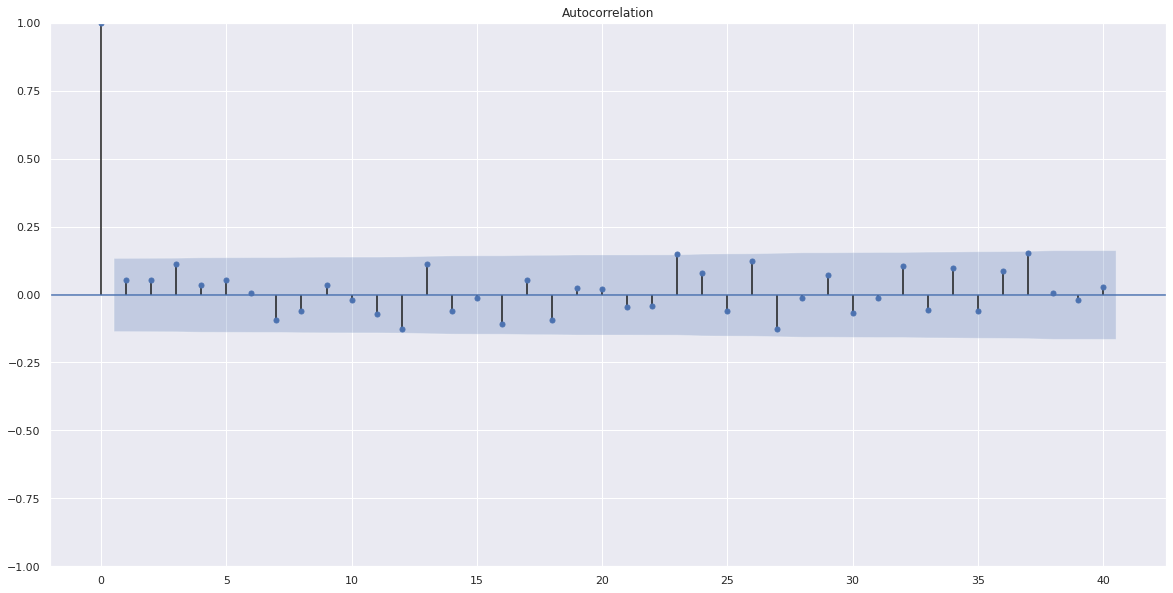

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuo_lasso,lags=40)
plt.show()

###Random forest

In [ ]:
##Pegando os melhores paramentros
for j in result_random.columns:
  if j == 'criterion':
    criterion = result_random.loc[result_random.index[0],j]
  if j == 'max_features':
    max_features = result_random.loc[result_random.index[0],j]
  if j == 'n_estimators':
    n_estimators	 = result_random.loc[result_random.index[0],j]
  if j == 'max_depth':
    max_depth = result_random.loc[result_random.index[0],j]
  if j == 'min_samples_leaf':
    min_samples_leaf = result_random.loc[result_random.index[0],j]
  else:
    None
print(f'criterion:{criterion}')
print(f'max_features:{max_features}')
print(f'n_estimators:{n_estimators}')
print(f'max_depth:{max_depth}')
print(f'min_samples_leaf:{min_samples_leaf}')

criterion:squared_error
max_features:44
n_estimators:32
max_depth:30
min_samples_leaf:7


In [ ]:
result_random.head()

criterion  max_features  n_estimators  max_depth  min_samples_leaf  \
248   squared_error            44            32         30                 7   
925  absolute_error            83            48         16                 3   
781    friedman_mse            58             9         39                12   
261  absolute_error            98            69         22                 1   
214    friedman_mse            56            45         24                 1   

     mean_square_error  
248           4.108627  
925           4.159741  
781           4.193119  
261           4.212341  
214           4.242109

In [ ]:
rfr = RandomForestRegressor(random_state=0,
              criterion = criterion,
              max_features=max_features,
              n_estimators=n_estimators,
              max_depth=max_depth,
              min_samples_leaf=min_samples_leaf)

In [ ]:
rfr.fit(X, y)

RandomForestRegressor(max_depth=30, max_features=44, min_samples_leaf=7,
                      n_estimators=32, random_state=0)

In [ ]:
predic_rando_treino = rfr.predict(X)

In [ ]:
residuo_random = y-predic_rando_treino

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=residuo_random,name='Residuos Random', texttemplate = "%{y}",textfont_size=20))
fig.update_traces(opacity=0.55)
fig.update_layout(autosize=False, width=2000, height=1000,title_text=i)
fig.show()

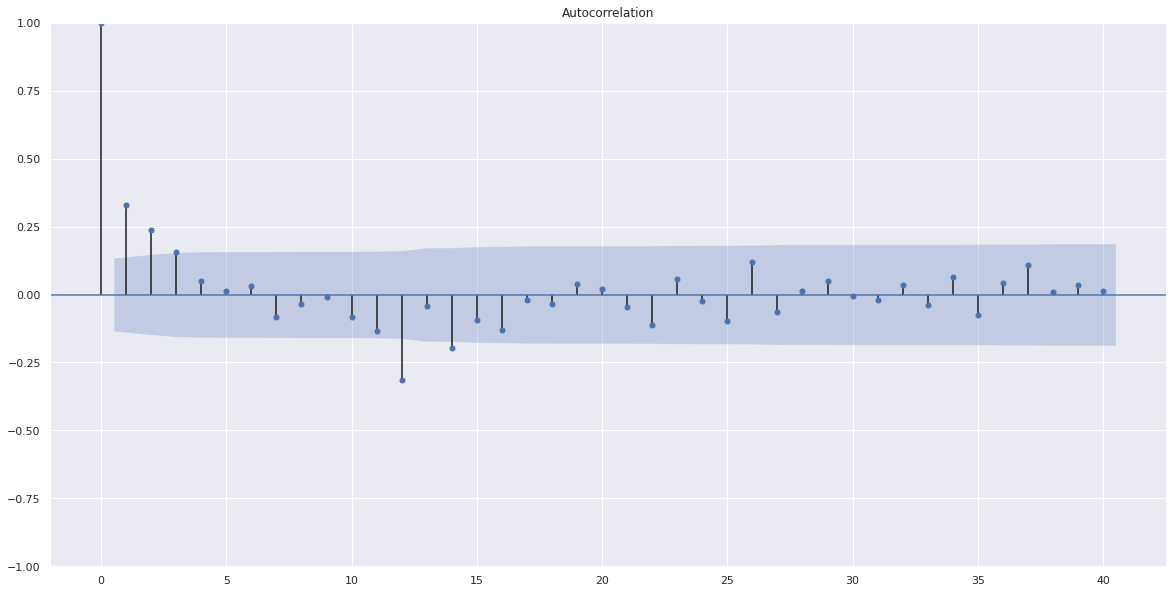

In [ ]:
sm.graphics.tsa.plot_acf(residuo_random,lags=40)
plt.show()

###Gradiente Boosting

In [ ]:
result_gradi_bostin.head()

loss  learning_rate  max_features  n_estimators  max_depth  \
859           huber       0.125771            54           122         13   
575  absolute_error       0.526154            54           181         14   
70   absolute_error       0.358798            54           431          7   
801  absolute_error       0.288063            54           120         31   
568           huber       0.178032            54           336         19   

     min_samples_leaf       criterio  mean_square_error  
859                11   friedman_mse           4.137896  
575                14   friedman_mse           4.200415  
70                 28  squared_error           4.229961  
801                15   friedman_mse           4.308488  
568                12   friedman_mse           4.320880

In [ ]:
##Pegando os melhores paramentros
for j in result_gradi_bostin.columns:
  if j == 'loss':
    loss = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'max_features':
    max_features = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'n_estimators':
    n_estimators	 = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'max_depth':
    max_depth = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'min_samples_leaf':
    min_samples_leaf = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'learning_rate':
    learning_rate = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'criterio':
    criterio = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  else:
    None
print(f'criterion:{criterion}')
print(f'max_features:{max_features}')
print(f'n_estimators:{n_estimators}')
print(f'max_depth:{max_depth}')
print(f'min_samples_leaf:{min_samples_leaf}')
print(f'learning_rate:{learning_rate}')
print(f'loss:{loss}')

criterion:squared_error
max_features:54
n_estimators:122
max_depth:13
min_samples_leaf:11
learning_rate:0.1257710407296557
loss:huber


In [ ]:
grad_bost = GradientBoostingRegressor(random_state=0,
                loss = loss,
                learning_rate = learning_rate,
                criterion=criterion,
                max_features=max_features,
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf)
grad_bost.fit(X, y)

GradientBoostingRegressor(criterion='squared_error',
                          learning_rate=0.1257710407296557, loss='huber',
                          max_depth=13, max_features=54, min_samples_leaf=11,
                          n_estimators=122, random_state=0)

In [ ]:
predict_grad_treino = grad_bost.predict(X)

In [ ]:
residuo_grad = y - predict_grad_treino

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=residuo_grad,name='Residuos Gradiente', texttemplate = "%{y}",textfont_size=20))
fig.update_traces(opacity=0.55)
fig.update_layout(autosize=False, width=2000, height=1000,title_text=i)
fig.show()

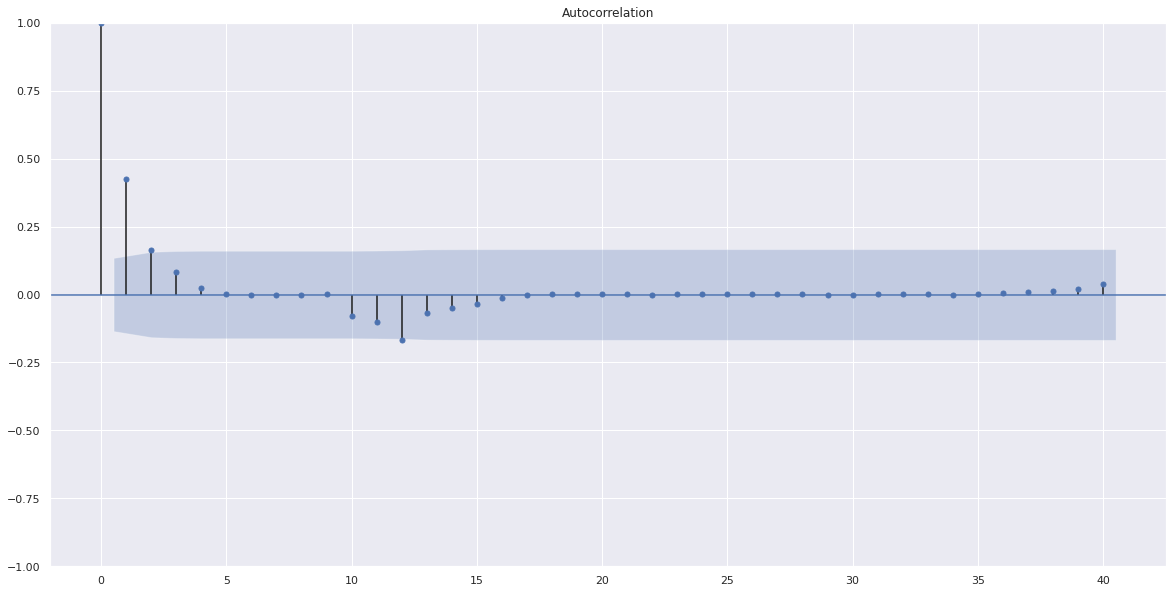

In [ ]:
sm.graphics.tsa.plot_acf(residuo_grad,lags=40)
plt.show()

##Previsao com dados de validacao

In [ ]:
y_val= dados_fin_val['producao_ind'].values
X_val=dados_fin_val.loc[:,dados_fin.columns != 'producao_ind'].values

In [ ]:
predict_lasso_vali = lasso.predict(X_val)
predict_random_vali = rfr.predict(X_val)
predict_gradiente_vali = grad_bost.predict(X_val)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_fin_val.index, y=y_val, name='PRODUÇÃO INDUSTRIAL',marker=dict(color='red')))
fig.add_trace(go.Scatter(x=dados_fin_val.index, y=predict_lasso_vali, name='LASSO',marker=dict(color='green')))
fig.add_trace(go.Scatter(x=dados_fin_val.index, y=predict_random_vali, name='RANDOM FOREST',marker=dict(color='black')))
fig.add_trace(go.Scatter(x=dados_fin_val.index, y=predict_gradiente_vali, name='LASSO',marker=dict(color='yellow')))
fig.update_layout(autosize=False, width=2000, height=1000)
fig.show()

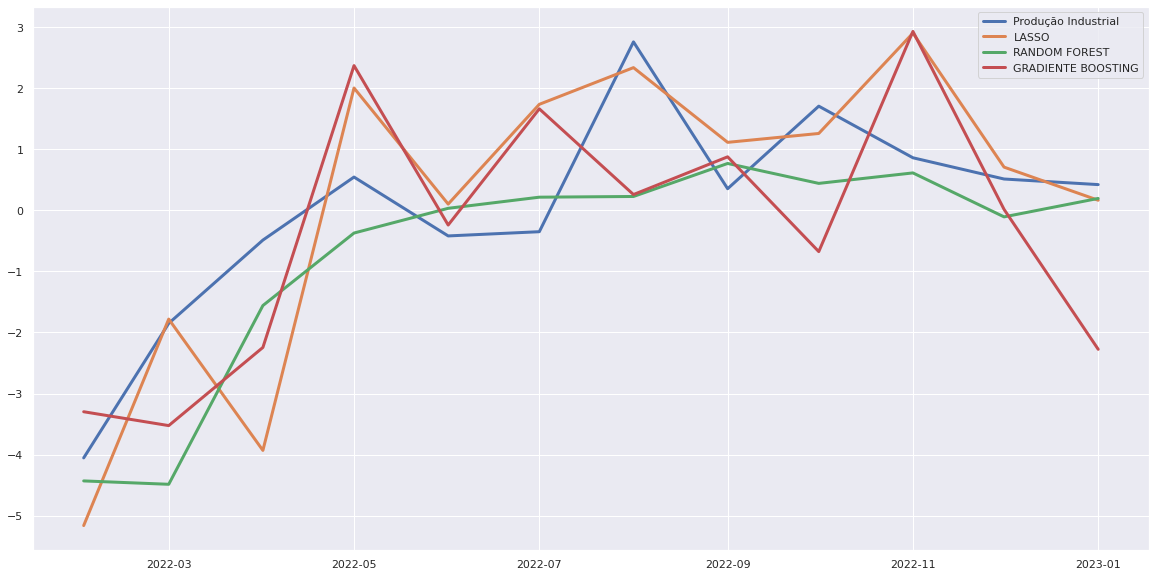

In [ ]:
plt.plot(dados_fin_val.index,y_val, label='Produção Industrial',linewidth=3)
plt.plot(dados_fin_val.index,predict_lasso_vali, label='LASSO',linewidth=3)
plt.plot(dados_fin_val.index,predict_random_vali, label='RANDOM FOREST',linewidth=3)
plt.plot(dados_fin_val.index,predict_gradiente_vali, label='GRADIENTE BOOSTING',linewidth=3)
plt.legend();

###Intervalos de previsao

In [ ]:
pre_int = pd.DataFrame(predict_random_vali,index=dados_fin_val.index,columns=['Random'])
pre_int['Random_0,90_cima'] = pre_int['Random'].apply(lambda x : x + (1.96*(abs(np.mean(residuo_random)))))
pre_int['Random_0,90_abaixo'] = pre_int['Random'].apply(lambda x : x - (1.96*(abs(np.mean(residuo_random)))))
plt.plot(pre_int.index,pre_int['Random'], label='Predição Random',linewidth=3)
plt.fill_between(pre_int.index, pre_int['Random_0,90_abaixo'], pre_int['Random_0,90_cima'], color='gray', alpha=0.2)
plt.plot(pre_int.index,y_val)

In [ ]:
def plotando_intervalo(predict_val,index,dados_validacao,residuos,nomes):
  pre_int = pd.DataFrame(predict_val,index=index,columns=[str(nomes)])
  residuos= abs(np.mean(residuos))
  pre_int[str(nomes) +'_0,90_cima'] = pre_int[str(nomes)].apply(lambda x : x + (1.96*(abs(np.mean(residuos)))))
  pre_int[str(nomes) +'_0,90_baixo'] = pre_int[str(nomes)].apply(lambda x : x - (1.96*(abs(np.mean(residuos)))))
  plt.plot(pre_int.index,pre_int[str(nomes)], label='Predição_'+str(nomes),linewidth=3)
  plt.fill_between(pre_int.index, pre_int[str(nomes)+'_0,90_cima'], pre_int[str(nomes) +'_0,90_baixo'], color='gray', alpha=0.2)
  plt.plot(pre_int.index,dados_validacao,label='Validação')
  plt.legend()
  return pre_int

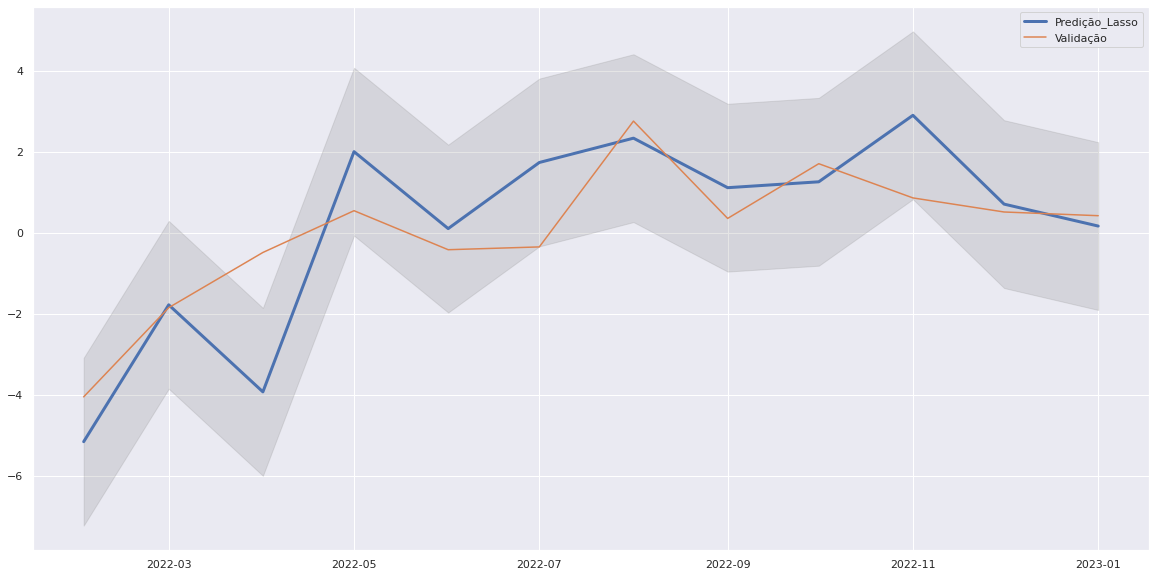

In [ ]:
intervalo_lasso = plotando_intervalo(predict_lasso_vali,dados_fin_val.index,y_val,residuo_las,'Lasso')

In [ ]:
intervalo_lasso

Lasso  Lasso_0,90_cima  Lasso_0,90_baixo
2022-02-01 -5.163267        -3.090214         -7.236320
2022-03-01 -1.781205         0.291848         -3.854258
2022-04-01 -3.931961        -1.858908         -6.005014
2022-05-01  2.003812         4.076865         -0.069241
2022-06-01  0.102437         2.175490         -1.970616
2022-07-01  1.736074         3.809128         -0.336979
2022-08-01  2.337154         4.410207          0.264101
2022-09-01  1.113403         3.186456         -0.959650
2022-10-01  1.258782         3.331836         -0.814271
2022-11-01  2.902108         4.975161          0.829055
2022-12-01  0.707618         2.780671         -1.365436
2023-01-01  0.165078         2.238131         -1.907975

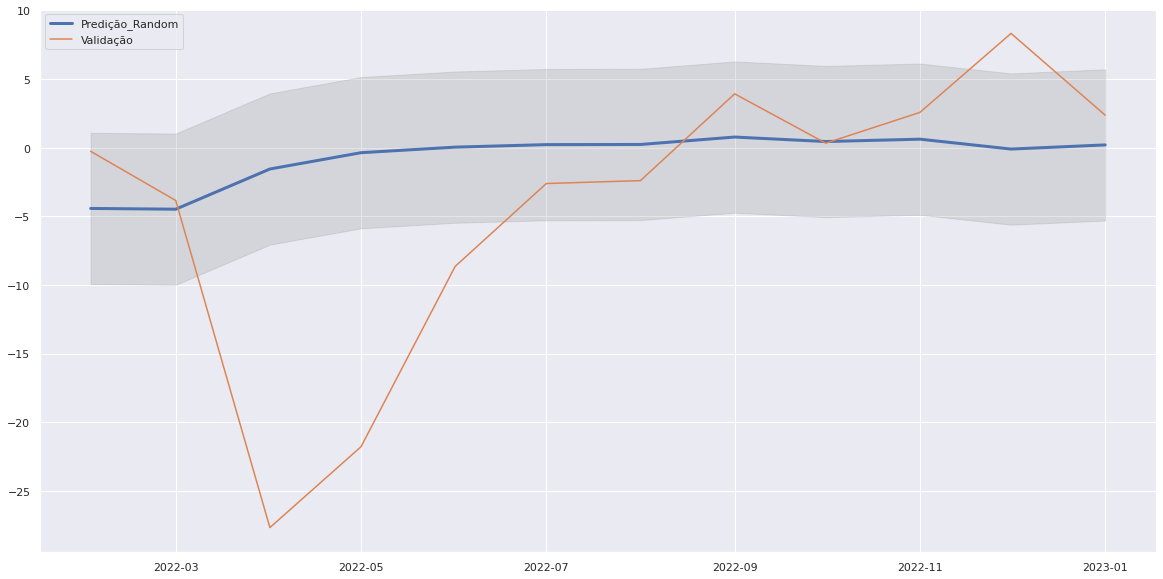

In [ ]:
intervalo_random = plotando_intervalo(predict_random_vali,dados_fin_val.index,y_val,residuo_rand,'Random')

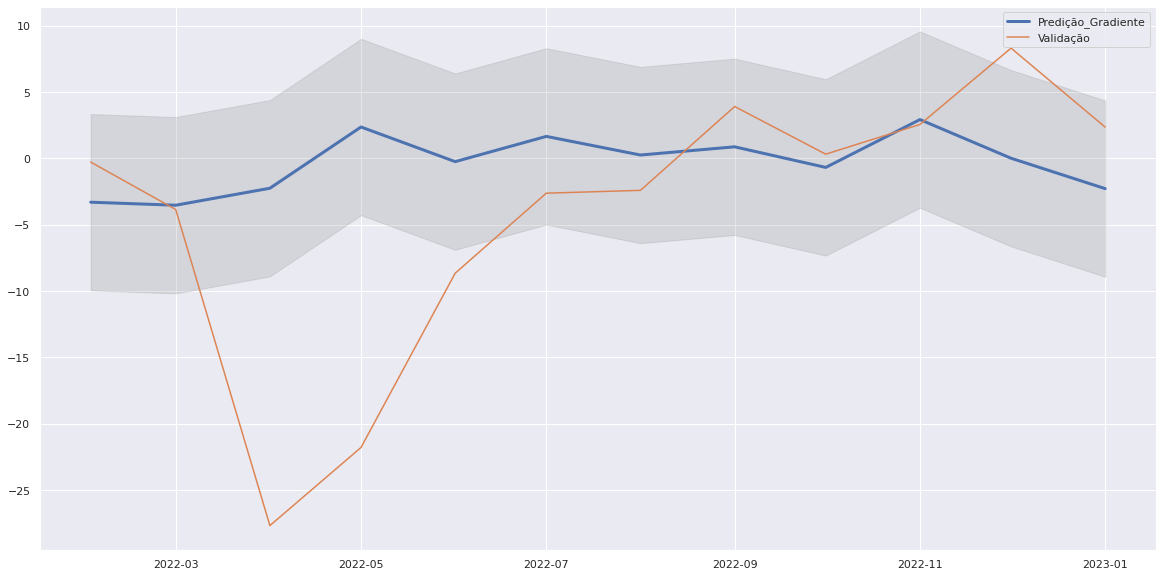

In [ ]:
intervalo_gradiente = plotando_intervalo(predict_gradiente_vali,dados_fin_val.index,y_val,residuo_gradiente,'Gradiente')


##Cenarios com dados fora da amostra

In [ ]:
y_fora= dados_defasados['producao_ind']
X_fora=dados_defasados.loc[:,dados_defasados.columns != 'producao_ind']

In [ ]:
X_fora.columns.str.contains("dummy")[j] != True

True

In [ ]:
dates = pd.date_range(start=datetime.now() + timedelta(days=30), periods=12, freq='M').strftime("%Y-%m-%d")
arima_predict = pd.DataFrame(index=dates)
for j,k in enumerate(X_fora.columns):
  if X_fora.columns.str.contains("dummy")[j] != True:
    model_arima = arima.auto_arima(X_fora[k].values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    model_arima.fit(X_fora[k].values)
    arima_predict[k] = model_arima.predict(n_periods=12)
  else:
    arima_predict[k] = [1]*12

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1691.812, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1749.186, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1704.541, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1697.485, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1687.468, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1702.919, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1688.924, Time=0.44 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1689.290, Time=0.62 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1690.161, Time=0.42 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1704.795, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1687.379, Time=0.68 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=1.95 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.69 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1687.198, Time=0.34 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1

<ipython-input-242-341aa2b7c19b>:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



 ARIMA(1,0,1)(0,0,0)[0]             : AIC=897.848, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2512.523, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2207.438, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=898.411, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=898.779, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1958.614, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=877.423, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=900.854, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=890.380, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=879.846, Time=0.47 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=879.205, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=923.523, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept 

<ipython-input-242-341aa2b7c19b>:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1395.740, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1468.823, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1424.018, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1399.860, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1466.823, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1395.031, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1415.263, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1396.970, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1397.012, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1400.504, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1416.103, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1395.871, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1393.100, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1393.787, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<ipython-input-242-341aa2b7c19b>:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1197.284, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2534.320, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1174.664, Time=0.80 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1176.257, Time=0.85 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1176.213, Time=0.76 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1180.904, Time=0.50 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1166.713, Time=1.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1164.787, Time=0.69 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1173.169, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1163.724, Time=0

<ipython-input-242-341aa2b7c19b>:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1274.956, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.094, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1315.294, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1280.217, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1350.102, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1276.811, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1276.823, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1275.548, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1300.844, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1278.424, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1273.010, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1278.237, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1313.303, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1274.871, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1274.883, Time=0.15 sec
 ARIMA(0,1

<ipython-input-242-341aa2b7c19b>:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=29.947, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=302.200, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=31.489, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=148.275, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=31.790, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=30.468, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=113.367, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=29.874, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=31.350, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=28.246, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=4.659, Time=0.41 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=19.406, Time=0.24 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=4.185, Time=0.36 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=4.728, Time=0.19 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=6.034, Time=0.58 se

<ipython-input-242-341aa2b7c19b>:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=74.505, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=244.369, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=85.054, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=136.912, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=76.292, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=75.838, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=127.609, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=79.366, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=71.257, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=65.757, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=64.315, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=67.365, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=66.310, Time=0.29 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 1.447 seconds


<ipython-input-242-341aa2b7c19b>:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
arima_predict.tail()

trafego_pesado  producao_ind_int  capacidade_instalada  \
2023-09-30        0.278191         93.302148             80.575414   
2023-10-31        0.243190         93.037285             80.574168   
2023-11-30        0.235344         92.882158             80.573083   
2023-12-31        0.212911         92.822421             80.572136   
2024-01-31        0.211989         92.832780             80.571311   

                caixas  faturamento  importacoes  importacoes_int  \
2023-09-30 -106.530580    -0.046515     0.988206        -0.001034   
2023-10-31  -64.179927    -0.027278     0.252163         0.000487   
2023-11-30  -21.459954    -0.015997     0.049203        -0.000229   
2023-12-31   -5.983216    -0.009381     0.657767         0.000108   
2024-01-31    2.123404    -0.005501     0.317746        -0.000051   

            confianca_empresario_exp  confianca_empresario_atual  \
2023-09-30                       0.0                         0.0   
2023-10-31                       0.0                         0.0   
2023-11-30                       0.0                         0.0   
2023-12-31                       0.0                         0.0   
2024-01-31                       0.0                         0.0   

            confianca_consumidor  ...  confianca_consumidor_lags_4  \
2023-09-30          4.893028e-10  ...                 3.638125e-08   
2023-10-31          4.744422e-11  ...                 3.523507e-09   
2023-11-30          4.600330e-12  ...                 3.412499e-10   
2023-12-31          4.460613e-13  ...                 3.304989e-11   
2024-01-31          4.325140e-14  ...                 3.200866e-12   

            producao_de_veiculos_lags_4  producao_aco_lags_4  \
2023-09-30                   -69.174620           138.808707   
2023-10-31                   -39.924664           138.721096   
2023-11-30                   -23.042827           138.648779   
2023-12-31                   -13.299345           138.589103   
2024-01-31                    -7.675819           138.539854   

            sond_compras_lags_4  sond_estoques_lags_4  sond_demanda_lags_4  \
2023-09-30            55.734590             49.498392            58.117402   
2023-10-31            55.719063             49.471322            58.114952   
2023-11-30            55.708683             49.449521            58.113700   
2023-12-31            55.701744             49.431964            58.113059   
2024-01-31            55.697104             49.417825            58.112730   

            sond_exportacao_lags_4  sond_empregados_lags_4  selic_lags_4  \
2023-09-30               51.647553               52.990922      0.006731   
2023-10-31               51.646744               52.990918      0.005948   
2023-11-30               51.646394               52.990917      0.006397   
2023-12-31               51.646242               52.990917      0.004949   
2024-01-31               51.646176               52.990917      0.003308   

            ettj_26_lags_4  
2023-09-30        0.006030  
2023-10-31        0.007903  
2023-11-30        0.006011  
2023-12-31        0.004796  
2024-01-31        0.004749  

[5 rows x 107 columns]

In [ ]:
dum_arima = pd.get_dummies(pd.to_datetime(arima_predict.index).month)
##Apagando a ultima coluna que todas os numeros zeros irao responder pr ela
dum_arima.drop(12,axis=1,inplace=True)

In [ ]:
dum_arima.columns = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov']
dum_arima.index = arima_predict.index

In [ ]:
dum_arima

jan  fev  mar  abr  mai  jun  jul  ago  set  out  nov
2023-02-28    0    1    0    0    0    0    0    0    0    0    0
2023-03-31    0    0    1    0    0    0    0    0    0    0    0
2023-04-30    0    0    0    1    0    0    0    0    0    0    0
2023-05-31    0    0    0    0    1    0    0    0    0    0    0
2023-06-30    0    0    0    0    0    1    0    0    0    0    0
2023-07-31    0    0    0    0    0    0    1    0    0    0    0
2023-08-31    0    0    0    0    0    0    0    1    0    0    0
2023-09-30    0    0    0    0    0    0    0    0    1    0    0
2023-10-31    0    0    0    0    0    0    0    0    0    1    0
2023-11-30    0    0    0    0    0    0    0    0    0    0    1
2023-12-31    0    0    0    0    0    0    0    0    0    0    0
2024-01-31    1    0    0    0    0    0    0    0    0    0    0

In [ ]:
arima_dum_predict = arima_predict.join(dum_arima)
arima_dum_predict.head()

trafego_pesado  producao_ind_int  capacidade_instalada  \
2023-02-28        2.827780         92.425052             80.591093   
2023-03-31        0.436730         93.876403             80.587835   
2023-04-30        1.256833         94.476693             80.584995   
2023-05-31        0.403930         94.655402             80.582520   
2023-06-30        0.582633         94.446460             80.580363   

                 caixas  faturamento  importacoes  importacoes_int  \
2023-02-28  7693.595350    -1.950225    -0.598513         0.202355   
2023-03-31  7245.837261    -1.143670     2.921554        -0.095222   
2023-04-30  3558.852591    -0.670682    -0.284727         0.044809   
2023-05-31  1637.809579    -0.393308    -0.361717        -0.021086   
2023-06-30   315.961811    -0.230648     1.640569         0.009922   

            confianca_empresario_exp  confianca_empresario_atual  \
2023-02-28                 -0.285879                   -0.443241   
2023-03-31                  0.000000                    0.000000   
2023-04-30                  0.000000                    0.000000   
2023-05-31                  0.000000                    0.000000   
2023-06-30                  0.000000                    0.000000   

            confianca_consumidor  ...  fev  mar  abr  mai  jun  jul  ago  set  \
2023-02-28          6.072092e-03  ...    1    0    0    0    0    0    0    0   
2023-03-31          5.887676e-04  ...    0    1    0    0    0    0    0    0   
2023-04-30          5.708862e-05  ...    0    0    1    0    0    0    0    0   
2023-05-31          5.535479e-06  ...    0    0    0    1    0    0    0    0   
2023-06-30          5.367361e-07  ...    0    0    0    0    1    0    0    0   

            out  nov  
2023-02-28    0    0  
2023-03-31    0    0  
2023-04-30    0    0  
2023-05-31    0    0  
2023-06-30    0    0  

[5 rows x 118 columns]

In [ ]:
arima_dum_predict.to_csv('arima_dum_predict.csv')

In [ ]:
arima_lasso = lasso.predict(arima_dum_predict.values)
arima_random = rfr.predict(arima_dum_predict.values)
arima_gradien = grad_bost.predict(arima_dum_predict.values)

In [ ]:
predicao = pd.DataFrame({'lassso':arima_lasso,
                         'Random Forest':arima_random,
                         'Gradiente Bosting':arima_gradien},
                        index=pd.to_datetime(arima_dum_predict.index).strftime("%Y-%m"))

In [ ]:
predicao

lassso  Random Forest  Gradiente Bosting
2023-02 -0.748474       0.474949          -0.559305
2023-03 -0.124878       0.792835          -0.685641
2023-04 -0.186113       0.839119          -0.430308
2023-05  0.200904       0.601590           0.047288
2023-06  0.268480       0.463045           0.083182
2023-07  0.326808       0.246933           0.040223
2023-08  0.296088       0.320362          -0.121796
2023-09  0.305829       0.320362          -0.126317
2023-10  0.269728       0.372998          -0.025448
2023-11  0.256010       0.372998          -0.042575
2023-12  0.251315       0.372998          -0.049330
2024-01  0.240050       0.147560          -0.042575

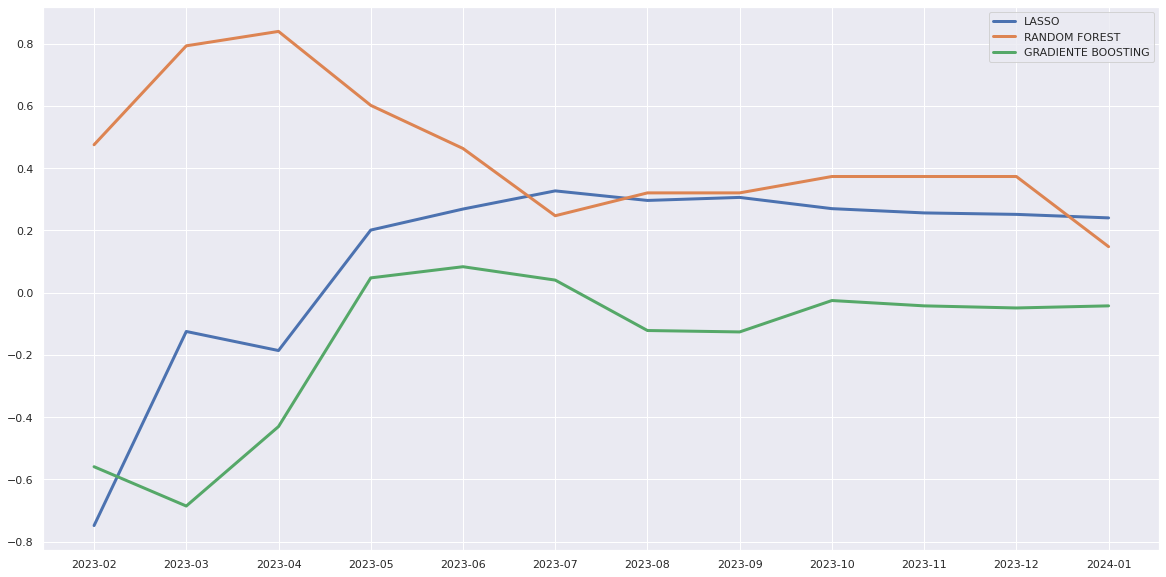

In [ ]:
plt.plot(pd.to_datetime(arima_dum_predict.index).strftime("%Y-%m"),arima_lasso, label='LASSO',linewidth=3)
plt.plot(pd.to_datetime(arima_dum_predict.index).strftime("%Y-%m"),arima_random, label='RANDOM FOREST',linewidth=3)
plt.plot(pd.to_datetime(arima_dum_predict.index).strftime("%Y-%m"),arima_gradien, label='GRADIENTE BOOSTING',linewidth=3)
plt.legend();

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=arima_dum_predict.index, y=arima_lasso, name='LASSO',marker=dict(color='red')))
fig.add_trace(go.Scatter(x=arima_dum_predict.index, y=arima_random, name='RANDOM FOREST',marker=dict(color='green')))
fig.add_trace(go.Scatter(x=arima_dum_predict.index, y=arima_gradien, name='GRADIENTE BOSTING',marker=dict(color='black')))
fig.update_layout(autosize=False, width=2000, height=1000)
fig.show()

##Intervalo de previsao

In [ ]:
def plotando_intervalo_cenario(predict_val,index,residuos,nomes):
  pre_int = pd.DataFrame(predict_val,index=index,columns=[str(nomes)])
  residuos= abs(np.mean(residuos))
  pre_int[str(nomes) +'_0,90_cima'] = pre_int[str(nomes)].apply(lambda x : x + (1.96*(abs(np.mean(residuos)))))
  pre_int[str(nomes) +'_0,90_abaixo'] = pre_int[str(nomes)].apply(lambda x : x - (1.96*(abs(np.mean(residuos)))))
  plt.plot(pre_int.index,pre_int[str(nomes)], label='Predição_'+str(nomes),linewidth=3)
  plt.fill_between(pre_int.index, pre_int[str(nomes)+'_0,90_cima'], pre_int[str(nomes) +'_0,90_abaixo'], color='gray', alpha=0.2)
  plt.legend()
  return pre_int

Lasso  Lasso_0,90_cima  Lasso_0,90_baixo
2023-02 -0.748474         1.324580         -2.821527
2023-03 -0.124878         1.948175         -2.197931
2023-04 -0.186113         1.886940         -2.259166
2023-05  0.200904         2.273958         -1.872149
2023-06  0.268480         2.341533         -1.804573
2023-07  0.326808         2.399861         -1.746245
2023-08  0.296088         2.369141         -1.776965
2023-09  0.305829         2.378882         -1.767224
2023-10  0.269728         2.342781         -1.803325
2023-11  0.256010         2.329063         -1.817043
2023-12  0.251315         2.324368         -1.821738
2024-01  0.240050         2.313103         -1.833003

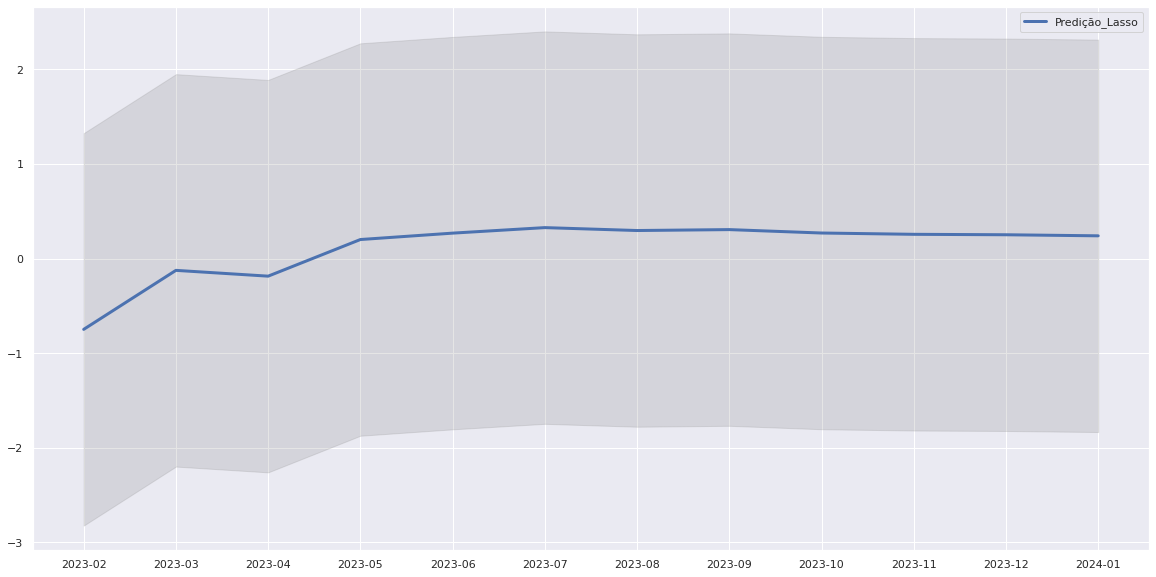

In [ ]:
plotando_intervalo_cenario(arima_lasso,predicao.index,residuo_las,'Lasso')

random  random_0,90_cima  random_0,90_abaixo
2023-02  0.474949          6.145866           -5.195967
2023-03  0.792835          6.463752           -4.878082
2023-04  0.839119          6.510036           -4.831797
2023-05  0.601590          6.272507           -5.069326
2023-06  0.463045          6.133961           -5.207872
2023-07  0.246933          5.917850           -5.423983
2023-08  0.320362          5.991279           -5.350555
2023-09  0.320362          5.991279           -5.350555
2023-10  0.372998          6.043915           -5.297919
2023-11  0.372998          6.043915           -5.297919
2023-12  0.372998          6.043915           -5.297919
2024-01  0.147560          5.818477           -5.523356

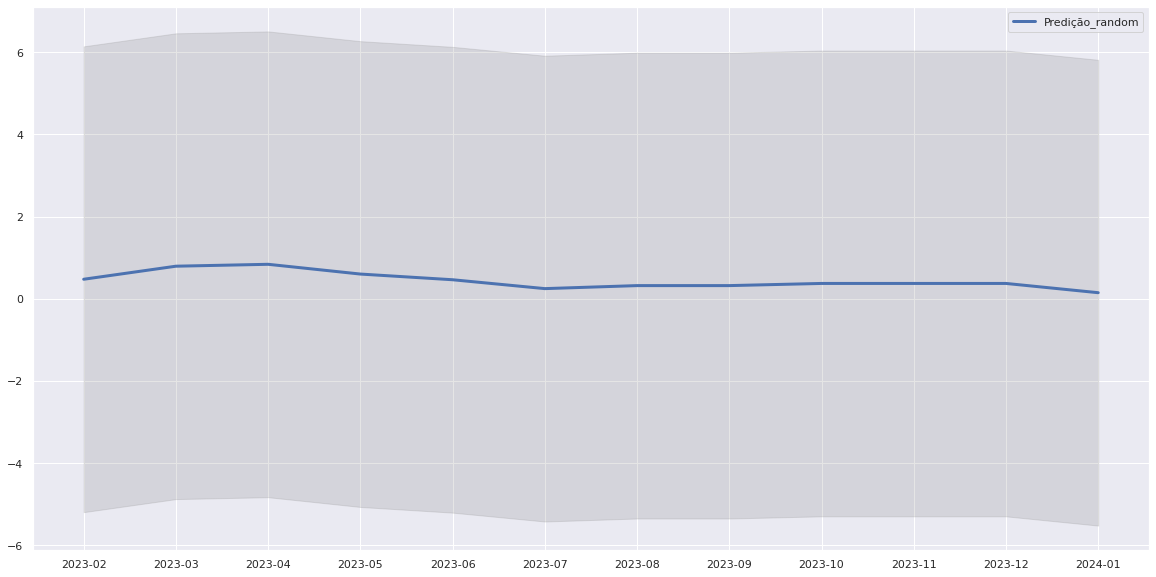

In [ ]:
plotando_intervalo_cenario(arima_random,predicao.index,residuo_rand,'random')

Gradiente  Gradiente_0,90_cima  Gradiente_0,90_abaixo
2023-02  -0.559305             6.086300              -7.204910
2023-03  -0.685641             5.959964              -7.331246
2023-04  -0.430308             6.215297              -7.075913
2023-05   0.047288             6.692893              -6.598317
2023-06   0.083182             6.728787              -6.562423
2023-07   0.040223             6.685828              -6.605382
2023-08  -0.121796             6.523809              -6.767401
2023-09  -0.126317             6.519288              -6.771921
2023-10  -0.025448             6.620157              -6.671053
2023-11  -0.042575             6.603030              -6.688180
2023-12  -0.049330             6.596274              -6.694935
2024-01  -0.042575             6.603030              -6.688180

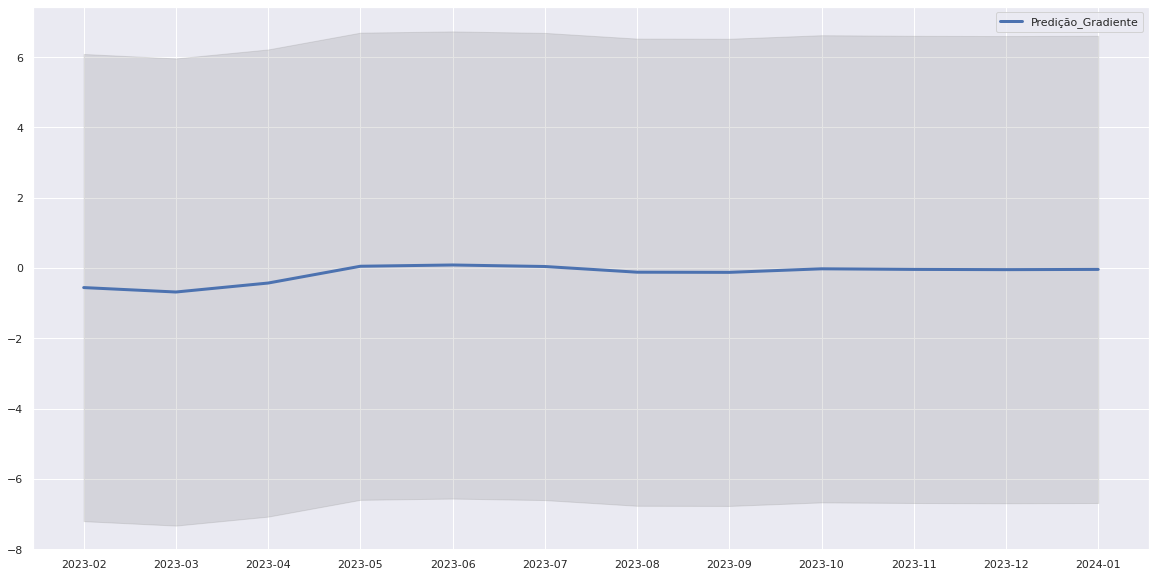

In [ ]:
plotando_intervalo_cenario(arima_gradien,predicao.index,residuo_gradiente,'Gradiente')